<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## Background

Real Sky Estate Development has been developing residential areas around Ames and is looking to procure and develop new housing in the area. 

Previous housing developments were not returning favourable profits due to the recent pandemic and political tensions, which lead to the rise in the costs of living and building materials over the years.

Facing a forecasted recession in the upcoming year, Real Sky senior management team has reached out to our data science team to pinpoint factors that will be directed towards revamping the company’s focus structure to improve the attractiveness and sales price of new housing developments.

## Problem Statement

What are the core features to focus on, so as to increase the sale price of homes for the next development project.

## Import Libraries

In [1]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import math


from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Function for Histogram Comparison

In [2]:
def compare_histograms(imputed_column, original_column, x_label, y_label = 'Frequency'):
    fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (16,9))

    # Set axes of histograms.
    mode = statistics.mode(imputed_column)
    rnge = max(original_column) - min(original_column)
    xmin = min(original_column) - 0.02 * rnge
    xmax = max(original_column) + 0.02 * rnge
    ymax = 1400

    ax0.set_xlim(xmin, xmax)
    ax0.set_ylim(0, ymax)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)

    # Set top labels.
    ax0.set_title('Real Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax0.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax0.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax0.set_xticks([])
    ax0.set_yticks([])

    # Generate top histogram.
    ax0.hist(original_column, bins = 15, color = '#185fad', alpha = 0.75, label = '')
    ax0.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax0.legend(prop={'size': 15}, loc = 1)

    # Set bottom labels.
    ax1.set_title('Imputed Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax1.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax1.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Generate bottom histogram.
    ax1.hist(imputed_column, bins = 15, color = 'orange', alpha = 0.75, label = '', stacked = True)
    ax1.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax1.axvline(np.mean(imputed_column), color = 'darkorange', lw = 5, label = 'Imputed Mean')
    ax1.legend(prop={'size': 15}, loc = 1)

    plt.tight_layout();

## Data Import & Cleaning

In [3]:
#dataset for model training
train = pd.read_csv("../datasets/train.csv")

#change display options
pd.set_option("display.max_rows", 160)
pd.set_option("display.max_columns", 80)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### **Cleaning "train" Dataset**

**_Iterative Imputer for Lot Frontage_**

In [4]:
#new dataframe without any missing value
train_missing = train.iloc[:,[0,4,5]]
lot_frontage_missing = train_missing.dropna()

In [5]:
#new dataframe without any missing value
train_missing = train.iloc[:,[0,4,5]]
lot_frontage_missing = train_missing.dropna()

In [6]:
#fit/transform
it_imp = IterativeImputer(estimator = LinearRegression()) #can be lasso/ridge as well
it_imp_lot_frontage_missing = it_imp.fit_transform(train_missing)
it_imp_lot_frontage_missing = pd.DataFrame(it_imp_lot_frontage_missing, columns = train_missing.columns)

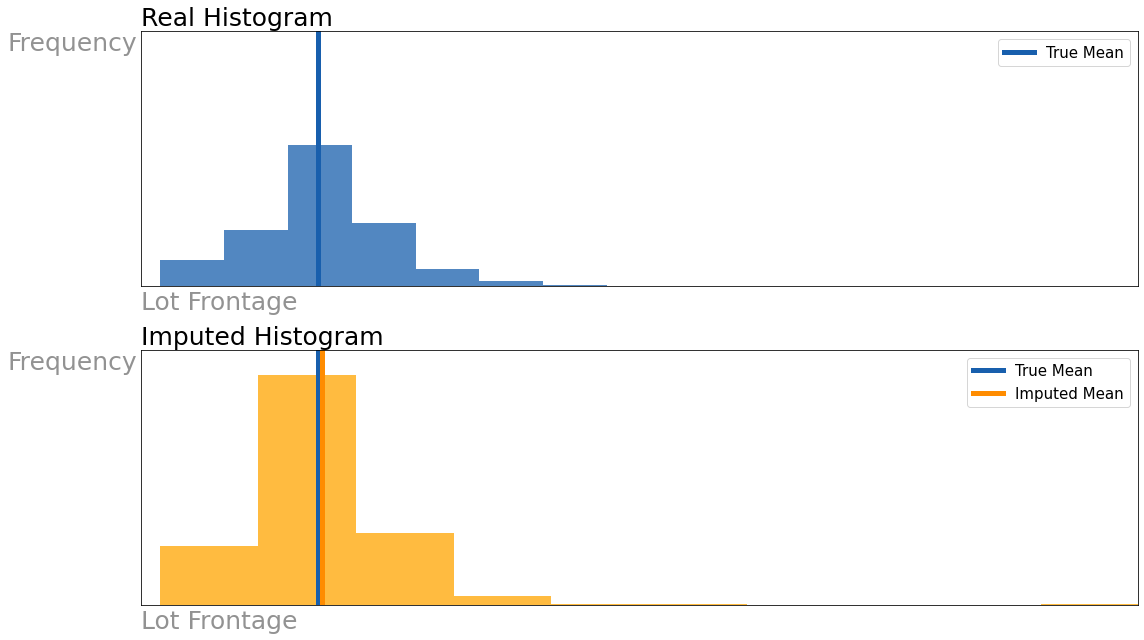

In [7]:
#histogram comparison
compare_histograms(imputed_column = it_imp_lot_frontage_missing['Lot Frontage'],
                   original_column = lot_frontage_missing['Lot Frontage'],
                   x_label = 'Lot Frontage',
                   y_label = 'Frequency')

In [8]:
#replace Lot Frontage data in original dataset
train_1 = train
train_1["Lot Frontage"] = it_imp_lot_frontage_missing["Lot Frontage"]

**Observations from implementing iterative imputer on Lot Frontage column:**
- Observe that there were no significant change in the imputed mean from the true mean value. 
- Distribution of Lot Frontage data points were relatively similar after the application of interative imputer. 

**_Drop columns with >90% data missing and their linking columns_**

In [9]:
#columns with >90% data missing: Alley, Pool QC, Misc Feature
train_2 = train_1.drop(["Alley","Pool QC", "Misc Feature"], axis = 1)

In [10]:
#columns which are linked to columns with >90% missing data: Pool Area, Misc Val have >90% 0 values
#columns which do not have impact to future housing value: PID, Yr Sold
display(train_2["Misc Val"].value_counts())
display(train_2["Pool Area"].value_counts())
train_2_1 = train_2.drop(["Misc Val","Pool Area","Yr Sold","PID"], axis = 1)

0        1986
400        12
500         8
600         6
450         5
2000        5
700         4
1200        2
3000        2
2500        2
4500        2
17000       1
1300        1
900         1
1500        1
800         1
6500        1
54          1
3500        1
1150        1
300         1
455         1
8300        1
460         1
12500       1
480         1
650         1
80          1
Name: Misc Val, dtype: int64

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool Area, dtype: int64

**_Cleaning Up Null Values_**

**Bsmt Qual**

In [11]:
#check if Bsmt Qual null values are due to no garage area
display(train_2_1[train_2_1["Bsmt Qual"].isnull()]["Total Bsmt SF"].value_counts())

#notice that there is 1 row where Bsmt Qual is null, but with no value under Total Bsmt SF
display(train_2_1[(train_2_1["Bsmt Qual"].isnull()) & (train_2_1["Total Bsmt SF"].isnull())])

0.0    54
Name: Total Bsmt SF, dtype: int64

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
1327  1342           20        RM          99.0      5940   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1327        Norm      1Fam      1Story             4             7   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1327        1946            1950      Gable   CompShg      MetalSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1327       CBlock         None           0.0         TA         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1327       NaN       NaN           NaN            NaN           NaN   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1327            NaN           NaN          NaN            NaN    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1327         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1327                0          896             NaN             NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1327          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1327           Unf          1.0        280.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1327           Y             0              0               0           0   

      Screen Porch  Fence  Mo Sold Sale Type  SalePrice  
1327             0  MnPrv        4     ConLD      79000

In [12]:
#since only single row, drop row 1327
train_3 = train_2_1.drop(index = 1327,axis = 0)

In [13]:
#replace remaining Bsmt Qual null values with "None"
train_3["impute_bsmt_qual"] = train_3["Bsmt Qual"].fillna('None')

**Bsmt Cond**

In [14]:
#check if Bsmt Cond null values are due to no garage
train_3[train_3["Bsmt Cond"].isnull()]["Total Bsmt SF"].value_counts()

0.0    54
Name: Total Bsmt SF, dtype: int64

In [15]:
#Bsmt Cond
train_3["impute_bsmt_cond"] = train_3["Bsmt Cond"].fillna('None')

**Bsmt Exposure**

In [16]:
#Bsmt Exposure
#notice that Bsmt Exposure col has 1993 non-null vs Bsmt Cond with 1996 non-null, check on what those 3 null cases are.
#notice common values for Bsmt Qual (Gd) and Bsmt Cond (TA)
display(train_3[(train_3["Bsmt Cond"].notnull()) & (train_3["Bsmt Exposure"].isnull())]) 
temp = (train_3[(train_3["Bsmt Cond"].notnull()) & (train_3["Bsmt Exposure"].isnull())])

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
1456  1797           60        FV          81.0     10411   Pave       Reg   
1547    67           20        RL          73.0      8987   Pave       Reg   
1997  2780           60        RL          65.0     14006   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1456          Lvl    AllPub     Corner        Gtl      Somerst        Norm   
1547          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1997          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1456        Norm      1Fam      2Story             5             5   
1547        Norm      1Fam      1Story             8             5   
1997        Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1456        2007            2007      Gable   CompShg      VinylSd   
1547        2005            2006      Gable   CompShg      VinylSd   
1997        2002            2002      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1456      VinylSd         None           0.0         Gd         TA     CBlock   
1547      VinylSd      BrkFace         226.0         Gd         TA      PConc   
1997      VinylSd      BrkFace         144.0         Gd         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1456        Gd        TA           NaN            Unf           0.0   
1547        Gd        TA           NaN            Unf           0.0   
1997        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1456            Unf           0.0        725.0          725.0    GasA   
1547            Unf           0.0       1595.0         1595.0    GasA   
1997            Unf           0.0        936.0          936.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1456         Ex           Y      SBrkr         725         863   
1547         Ex           Y      SBrkr        1595           0   
1997         Ex           Y      SBrkr         936         840   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1456                0         1588             0.0             0.0          3   
1547                0         1595             0.0             0.0          2   
1997                0         1776             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1456          0              3              1           Gd              8   
1547          0              2              1           Gd              6   
1997          1              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1456        Typ           0          NaN      Attchd         2007.0   
1547        Typ           1           Gd      Attchd         2005.0   
1997        Typ           1           TA      Attchd         2002.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1456           Unf          2.0        561.0          TA          TA   
1547           RFn          3.0        880.0          TA          TA   
1997           RFn          2.0        474.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1456           Y             0              0               0           0   
1547           Y           144              0               0           0   
1997           Y           144             96               0           0   

      Screen Porch Fence  Mo Sold Sale Type  SalePrice impute_bsmt_qual  \
1456             0   NaN        7       New     212109      

In [17]:
#filter out Bsmt Qual (Gd) and Bsmt Cond (TA)
display(train_3[(train_3["Bsmt Cond"]=="Gd") & (train_3["Bsmt Qual"]=="TA")].head())
check = train_3[(train_3["Bsmt Cond"]=="Gd") & (train_3["Bsmt Qual"]=="TA")]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
232  2858           70        RL     60.000000      9550   Pave       IR1   
346  2724           80        RL     69.505945     10246   Pave       IR1   
402   262           20        RL     75.000000     10650   Pave       Reg   
411  2176           20        RL     63.806944      7917   Pave       IR1   
474  2216           50        RL    110.000000      7810   Pave       IR1   

    Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
232          Lvl    AllPub     Corner        Gtl      Crawfor        Norm   
346          Lvl    AllPub    CulDSac        Gtl       Sawyer        Norm   
402          Lvl    AllPub     Corner        Gtl      CollgCr        Norm   
411          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
474          HLS    AllPub     Inside        Gtl      Crawfor        Norm   

    Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
232        Norm      1Fam      2Story             7             5        1915   
346        Norm      1Fam        SLvl             4             9        1965   
402        Norm      1Fam      1Story             5             6        1976   
411        Norm      1Fam      1Story             6             7        1976   
474        Norm      1Fam      1.5Fin             4             6        1930   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
232            1970      Gable   CompShg      Wd Sdng      Wd Shng   
346            2001      Gable   CompShg      VinylSd      VinylSd   
402            1976      Gable   CompShg      HdBoard      HdBoard   
411            1976        Hip   CompShg      HdBoard      HdBoard   
474            2003      Gable   CompShg      AsbShng      CmentBd   

    Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
232         None           0.0         TA         TA     BrkTil        TA   
346         None           0.0         TA         Gd     CBlock        TA   
402         None           0.0         TA         TA     CBlock        TA   
411      BrkFace         174.0         TA         Gd     CBlock        TA   
474         None           0.0         TA         Gd     BrkTil        TA   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
232        Gd            No            ALQ         216.0            Unf   
346        Gd            Av            GLQ         648.0            Unf   
402        Gd            Av            LwQ         182.0            ALQ   
411        Gd            No            BLQ         751.0            Unf   
474        Gd            No            GLQ         189.0            Unf   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
232           0.0        540.0          756.0    GasA         Gd           Y   
346           0.0          0.0          648.0    GasA         Ex           Y   
402         712.0          0.0          894.0    GasA         TA           Y   
411           0.0        392.0         1143.0    GasA         TA           Y   
474           0.0        741.0          930.0    GasA         Ex           Y   

    Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
232      SBrkr         961         756                0         1717   
346      SBrkr         960           0                0          960   
402      SBrkr         894           0                0          894   
411      SBrkr        1113           0                0         1113   
474      SBrkr        1230         525                0         1755   

     Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
232             1.0             0.0          1          0              3   
346             1.0             1.0          0          0              0   
402             1.0             0.0          1          0              3   
411             1.0             0.0      

In [18]:
#checking the count for each value under Bsmt Exposure
display(check["Bsmt Exposure"].value_counts())

No    11
Gd     5
Av     3
Mn     1
Name: Bsmt Exposure, dtype: int64

In [19]:
#Replace null cases with "No" - No exposure (highest count)
train_3["impute_bsmt_exposure"] = train_3["Bsmt Exposure"]
train_3.iloc[[1456,1547,1997],75] = train_3.iloc[[1456,1547,1997],75].fillna('No')

In [20]:
#Replace remaining null values in impute_bsmt_exposure with "None"
train_3["impute_bsmt_exposure"] = train_3["impute_bsmt_exposure"].fillna('None')

display(train_3["impute_bsmt_exposure"].unique())

array(['No', 'Gd', 'Av', 'None', 'Mn'], dtype=object)

**BsmtFin Type 1**

In [21]:
#check if BsmtFin Type 1 null values are due to no garage
train_3[train_3["BsmtFin Type 1"].isnull()]["Total Bsmt SF"].value_counts()

0.0    54
Name: Total Bsmt SF, dtype: int64

In [22]:
#replace null values with "None"
train_3["impute_bsmtfin_type_1"] = train_3["BsmtFin Type 1"].fillna('None')

**BsmtFin Type 2**

In [23]:
#Observe 1 additional row with null value.
display(train_3[(train_3["BsmtFin Type 2"].isnull()) & train_3["BsmtFin SF 2"] != 0].head())

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
1147  445           20        RL          85.0     10655   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1147          Lvl    AllPub     Inside        Gtl      NridgHt        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1147        Norm      1Fam      1Story             8             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1147        2003            2004      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1147      VinylSd      BrkFace         296.0         Gd         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1147        Gd        TA            No            GLQ        1124.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1147            NaN         479.0       1603.0         3206.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1147         Ex           Y      SBrkr        1629           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1147                0         1629             1.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1147          0              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1147        Typ           1           Gd      Attchd         2003.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1147           RFn          3.0        880.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1147           Y             0              0               0           0   

      Screen Porch Fence  Mo Sold Sale Type  SalePrice impute_bsmt_qual  \
1147             0   NaN       10       WD      284000               Gd   

     impute_bsmt_cond impute_bsmt_exposure impute_bsmtfin_type_1  
1147               TA                   No                   GLQ

In [24]:
#drop since only 1 row of data
train_4 = train_3.drop(index = 1147,axis = 0)
train_4.shape

(2049, 78)

In [25]:
#replace remaining null rows with "None"
train_4["impute_bsmtfin_type_2"] = train_4["BsmtFin Type 2"].fillna('None')

**Fireplace Qu**

In [26]:
#Check on whether Fireplace Qu null values are due to absence of fireplace.
display(train_4[train_4["Fireplace Qu"].isnull()]["Fireplaces"].value_counts())

0    999
Name: Fireplaces, dtype: int64

In [27]:
#fill Fireplace Qu null values with "None"
train_4["impute_fireplace_qu"] = train_4["Fireplace Qu"].fillna("None")

**Garage Type**

In [28]:
#check if Garage Type null values are due to no garage
train_4[train_4["Garage Type"].isnull()]["Garage Area"].value_counts()

0.0    113
Name: Garage Area, dtype: int64

In [29]:
#fill Garage Type null values with "None"
train_4["impute_garage_type"] = train_4["Garage Type"].fillna("None")

**Garage Yr Blt**

In [30]:
#Check if null values in Garage Yr Blt is due to no garage
train_4[train_4["Garage Yr Blt"].isnull()]["Garage Area"].value_counts()

#only 1 case with null value in Garage Yr, but not showing as 0 in Garage Area

0.0    113
Name: Garage Area, dtype: int64

In [31]:
#Check on single case with null Yr Blt value and not showing as 0 in Garage Area
train_4[(train_4["Garage Yr Blt"].isnull()) & (train_4["impute_garage_type"] != "None")]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
1712  2237           70        RM          50.0      9060   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1712          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1712        Norm      1Fam      2Story             5             6   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1712        1923            1999      Gable   CompShg      Wd Sdng   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1712      Plywood         None           0.0         TA         TA     BrkTil   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1712        Gd        TA            No            ALQ         548.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1712            Unf           0.0        311.0          859.0    GasA   

     Heating QC  ... Electrical 1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
1712         Ex  ...      SBrkr        942         886                0   

      Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
1712         1828             0.0             0.0          2          0   

      Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual TotRms AbvGrd  Functional  \
1712              3              1            Gd             6         Typ   

     Fireplaces  Fireplace Qu Garage Type Garage Yr Blt  Garage Finish  \
1712          0           NaN      Detchd           NaN            NaN   

     Garage Cars  Garage Area  Garage Qual Garage Cond Paved Drive  \
1712         NaN          NaN          NaN         NaN           Y   

     Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
1712          174              0             212           0             0   

      Fence Mo Sold  Sale Type SalePrice  impute_bsmt_qual impute_bsmt_cond  \
1712  MnPrv       3        WD     150909                Gd               TA   

     impute_bsmt_exposure impute_bsmtfin_type_1 impute_bsmtfin_type_2  \
1712                   No                   ALQ                   Unf   

     impute_fireplace_qu impute_garage_type  
1712                None             Detchd  

[1 rows x 81 columns]

In [32]:
#drop single case
train_5 = train_4.drop(index = 1712,axis = 0)
train_5.shape

(2048, 81)

In [33]:
#replace remaining null columns with 0, since they are cases with no garage
train_5["impute_garage_yr_blt"] = train_5["Garage Yr Blt"].fillna(0)

**Garage Finish**

In [34]:
#Check if null values in Garage Finish is due to no garage
train_5[train_5["Garage Finish"].isnull()]["Garage Area"].value_counts()

0.0    113
Name: Garage Area, dtype: int64

In [35]:
#replace null columns with "None", since they are cases with no garage
train_5["impute_garage_finish"] = train_5["Garage Finish"].fillna("None")

**Garage Qual**

In [36]:
#Check if null values in Garage Qual is due to no garage
train_5[train_5["Garage Qual"].isnull()]["Garage Area"].value_counts()

0.0    113
Name: Garage Area, dtype: int64

In [37]:
#replace null columns with "None", since they are cases with no garage
train_5["impute_garage_qual"] = train_5["Garage Qual"].fillna("None")

**Garage Cond**

In [38]:
#Check if null values in Garage Qual is due to no garage
train_5[train_5["Garage Cond"].isnull()]["Garage Area"].value_counts()

0.0    113
Name: Garage Area, dtype: int64

In [39]:
#replace null columns with "None", since they are cases with no garage
train_5["impute_garage_cond"] = train_5["Garage Cond"].fillna("None")

**Fence**

In [40]:
#Replace null values with "None"
train_5["impute_fence"] = train_5["Fence"].fillna("None")

**Mas Vnr Type & Bsmt Full Bath**

In [41]:
#filtering away null cols (since only 25 cols, only takes up <5% of data)
train_6 = train_5[(train_5["Mas Vnr Type"].notnull()) & (train_5["Bsmt Full Bath"].notnull())]

#### **_Renaming and Dropping of Imputed/Original Pair Columns_**

In [42]:
train_7 = train_6
train_7["Bsmt Qual"] = train_7["impute_bsmt_qual"]
train_7["Bsmt Cond"] = train_7["impute_bsmt_cond"]
train_7["Bsmt Exposure"] = train_7["impute_bsmt_exposure"]
train_7["BsmtFin Type 1"] = train_7["impute_bsmtfin_type_1"]
train_7["BsmtFin Type 2"] = train_7["impute_bsmtfin_type_2"]
train_7["Fireplace Qu"] = train_7["impute_fireplace_qu"]
train_7["Garage Type"] = train_7["impute_garage_type"]
train_7["Garage Yr Blt"] = train_7["impute_garage_yr_blt"]
train_7["Garage Finish"] = train_7["impute_garage_finish"]
train_7["Garage Qual"] = train_7["impute_garage_qual"]
train_7["Garage Cond"] = train_7["impute_garage_cond"]
train_7["Garage Yr Blt"] = train_7["impute_garage_yr_blt"]
train_7["Fence"] = train_7["impute_fence"]

train_final = train_7.drop(train_7.iloc[:,range(74,86)],axis = 1)
train_final.columns = train_final.columns.str.lower()
train_final.columns = [col.replace(" ", "_") for col in train_final.columns]

display(train_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2025 non-null   int64  
 1   ms_subclass      2025 non-null   int64  
 2   ms_zoning        2025 non-null   object 
 3   lot_frontage     2025 non-null   float64
 4   lot_area         2025 non-null   int64  
 5   street           2025 non-null   object 
 6   lot_shape        2025 non-null   object 
 7   land_contour     2025 non-null   object 
 8   utilities        2025 non-null   object 
 9   lot_config       2025 non-null   object 
 10  land_slope       2025 non-null   object 
 11  neighborhood     2025 non-null   object 
 12  condition_1      2025 non-null   object 
 13  condition_2      2025 non-null   object 
 14  bldg_type        2025 non-null   object 
 15  house_style      2025 non-null   object 
 16  overall_qual     2025 non-null   int64  
 17  overall_cond  

None

## Feature Selection & EDA

## Exploratory Data Analysis

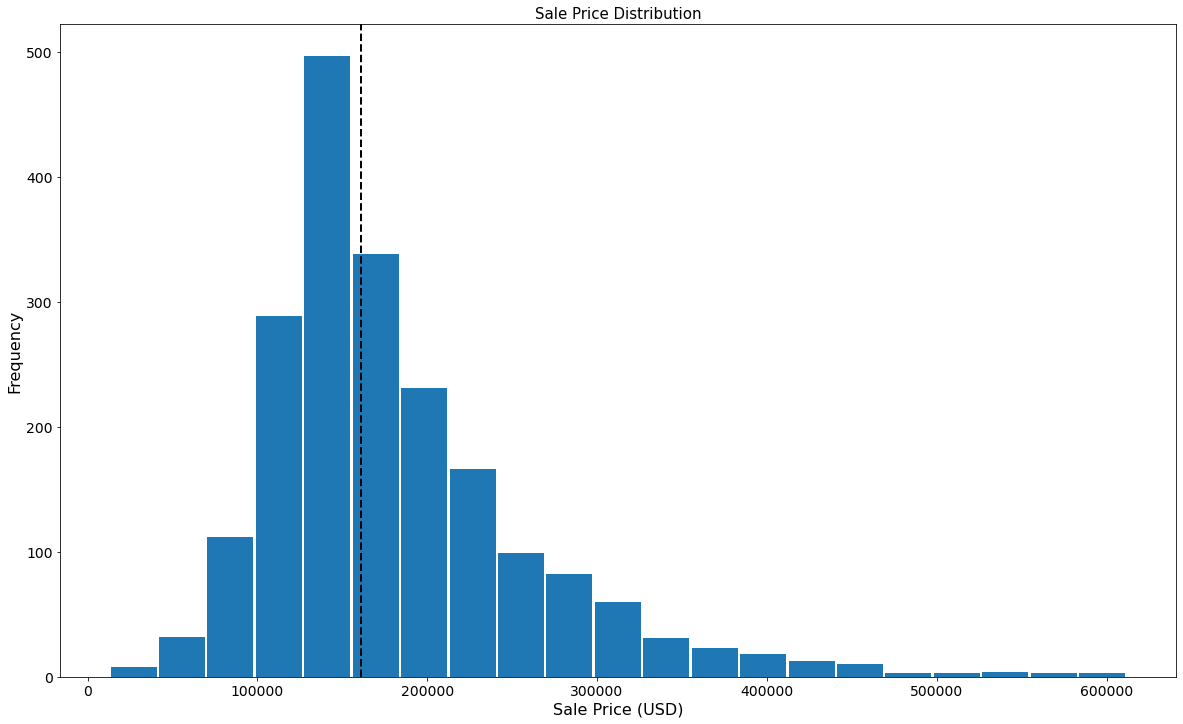

In [43]:
train_final["saleprice"].plot(kind = "hist", bins = 21, figsize = (20,12),rwidth=0.95)
plt.title("Sale Price Distribution",fontsize = 15)
plt.xlabel("Sale Price (USD)",fontsize = 16)
plt.ylabel("Frequency",fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.axvline(train_final["saleprice"].median(), color='k', linestyle='dashed', linewidth=2)


**Observations:**
- From the histogram plot of sale price, it was observed that the main distribution of sale prices falls within the 100 to 300K USD range, with the median sale price at ~160K. 
- It can also be observed that there were limited data for sale prices greater than 400K and lower than 50K. 
- This is an expected observation, as the demand for houses with higher sale prices are expected to be lower, due to their affordability. For houses lower than 50K sale prices, they probably have features which are undesired, causing those cases to fall into the low price ranges. 

(0.0, 800000.0)

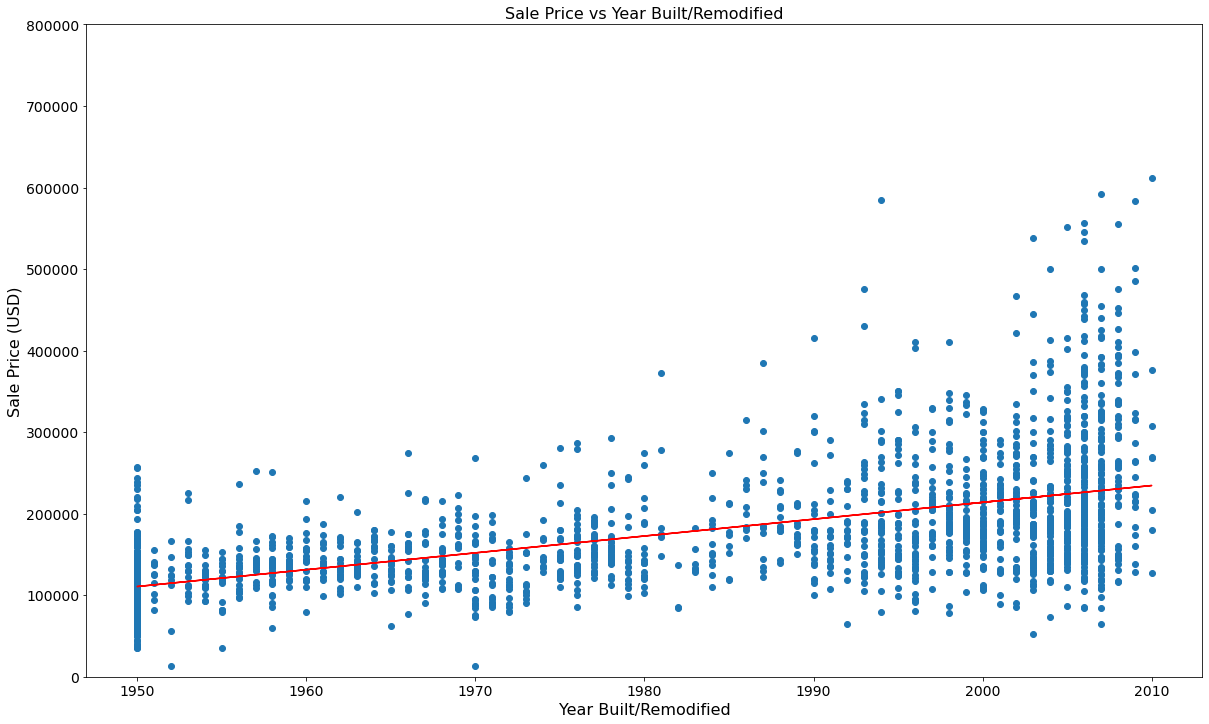

In [44]:
plt.figure(figsize = (20,12))
plt.scatter(train_final["year_remod/add"], train_final["saleprice"])

plt.title("Sale Price vs Year Built/Remodified",fontsize = 16)
plt.xlabel("Year Built/Remodified",fontsize = 16)
plt.ylabel("Sale Price (USD)",fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
x = train_final['year_remod/add']
y = train_final['saleprice']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),color = 'red')
plt.ylim(0,800000)

**Comments:**
- The team is working on a creating a model to predict sale price values of new housing developments. 
- As the data set we are working with contains data of houses that were built from 1950 till 2010, we need to first ensure that the age of the house is not a significant factor that affects historical sale prices.
- Looking at the correlation coefficient of the scatter plot of sale price vs year built/remodified, we see a weak correlation coefficient value of 0.5. 
- This means that there is poor linearity between sale pricing and year built.
- Thus it can be concluded that the age of the house in our dataset, is not a significant factor that affects housing sales pricing.

- Observation that pricing increases from 1990 to 2010.
- Based on further research, it shows that HPI index increased from 1990 to 2010 in USA, which probably resulted in the increase in sale pricing as what we have observed in the data set.
- Reference link: https://www.forbes.com/sites/johnwake/2018/11/02/the-next-housing-bust/?sh=353094318b79


<AxesSubplot:xlabel='year_remod/add', ylabel='saleprice'>

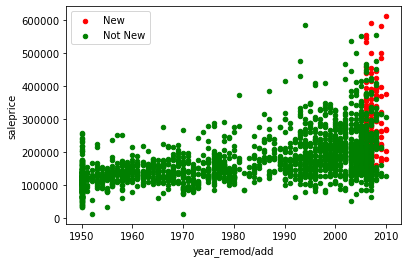

In [45]:
# segregation of scatterplot chart by new housing to verify whether the higher priced houses is due to new housed sold.
df1 = train_final[train_final["sale_type"]=="New"]
df2 = train_final[train_final["sale_type"]!="New"]

ax = df1.plot(x='year_remod/add', y='saleprice', kind='scatter', c='r', label='New')
df2.plot(x='year_remod/add', y='saleprice', kind='scatter', ax=ax, c='g', label='Not New')

**Comments:**
- Observe that new housing have a slightly higher overall pricing. However based on the segregated scatter plot chart, we are unable to explain the higher pricing from 1990 to 2000 is due to more new houses being transacted.

### **Creating New Features**

In [46]:
#creating new features

#total area in the house
train_final["c_total_area"] = train_final["gr_liv_area"] + train_final["total_bsmt_sf"]

#total_full_bath
train_final["c_total_full_bath"] = train_final["bsmt_full_bath"] + train_final["full_bath"]

#total_half_bath
train_final["c_total_half_bath"] = train_final["bsmt_half_bath"] + train_final["half_bath"]

#total_bath
train_final["c_total_bath"] = train_final["c_total_full_bath"] + train_final["c_total_half_bath"]

#percentage basement area unfinished
train_final["c_pct_bsmt_unf"] = train_final["bsmt_unf_sf"]/train_final["total_bsmt_sf"]

#percentage finished liv area with low quality
train_final["c_pct_low_qual_liv_area"] = train_final["low_qual_fin_sf"]/train_final["gr_liv_area"]

#basement area finished
train_final["c_tot_bsmt_fin"] = train_final["total_bsmt_sf"] - train_final["bsmt_unf_sf"]

#general living area with good quality
train_final["c_gr_liv_area_fin"] = train_final["gr_liv_area"] - train_final["low_qual_fin_sf"]

#total area in house less unfinished and low quality areas
train_final["c_total_gd_area"] = train_final["c_gr_liv_area_fin"] + train_final["c_tot_bsmt_fin"]

#total porch area
train_final["c_total_porch_area"] = train_final["wood_deck_sf"] + train_final["open_porch_sf"] + train_final["enclosed_porch"] + train_final["3ssn_porch"] + train_final["screen_porch"]

#move saleprice to the end
column_to_move = train_final.pop("saleprice")
train_final.insert(len(train_final.columns), "saleprice", column_to_move)

train_final.head()

id  ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0  109           60        RL     80.809046     13517   Pave       IR1   
1  544           60        RL     43.000000     11492   Pave       IR1   
2  153           20        RL     68.000000      7922   Pave       Reg   
3  318           60        RL     73.000000      9802   Pave       Reg   
4  255           50        RL     82.000000     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc  ... low_qual_fin_sf  \
0        192.0          725.0    GasA         Ex  ...               0   
1        276.0          913.0    GasA         Ex  ...               0   
2        326.0         1057.0    GasA         TA  ...               0   
3        384.0          384.0    GasA         Gd  ...               0   
4        676.0          676.0    GasA         TA  ...               0   

  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0        1479             0.0             0.0          2          1   
1        2122             1.0             0.0          2          1   
2        1057             1.0             0.0          1          0   
3        1444             0.0             0.0          2          1   
4        1445             0.0             0.0          2          0   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  functional  \
0              3              1            Gd              6         Typ   
1              4              1            Gd              8         Typ   
2              3              1            Gd              5         Typ   
3              3              1            TA              7         Typ   
4   

### Feature Correlation Checks

#### Numerical Features

**_Heatmap plot for numerical features_**

<AxesSubplot:>

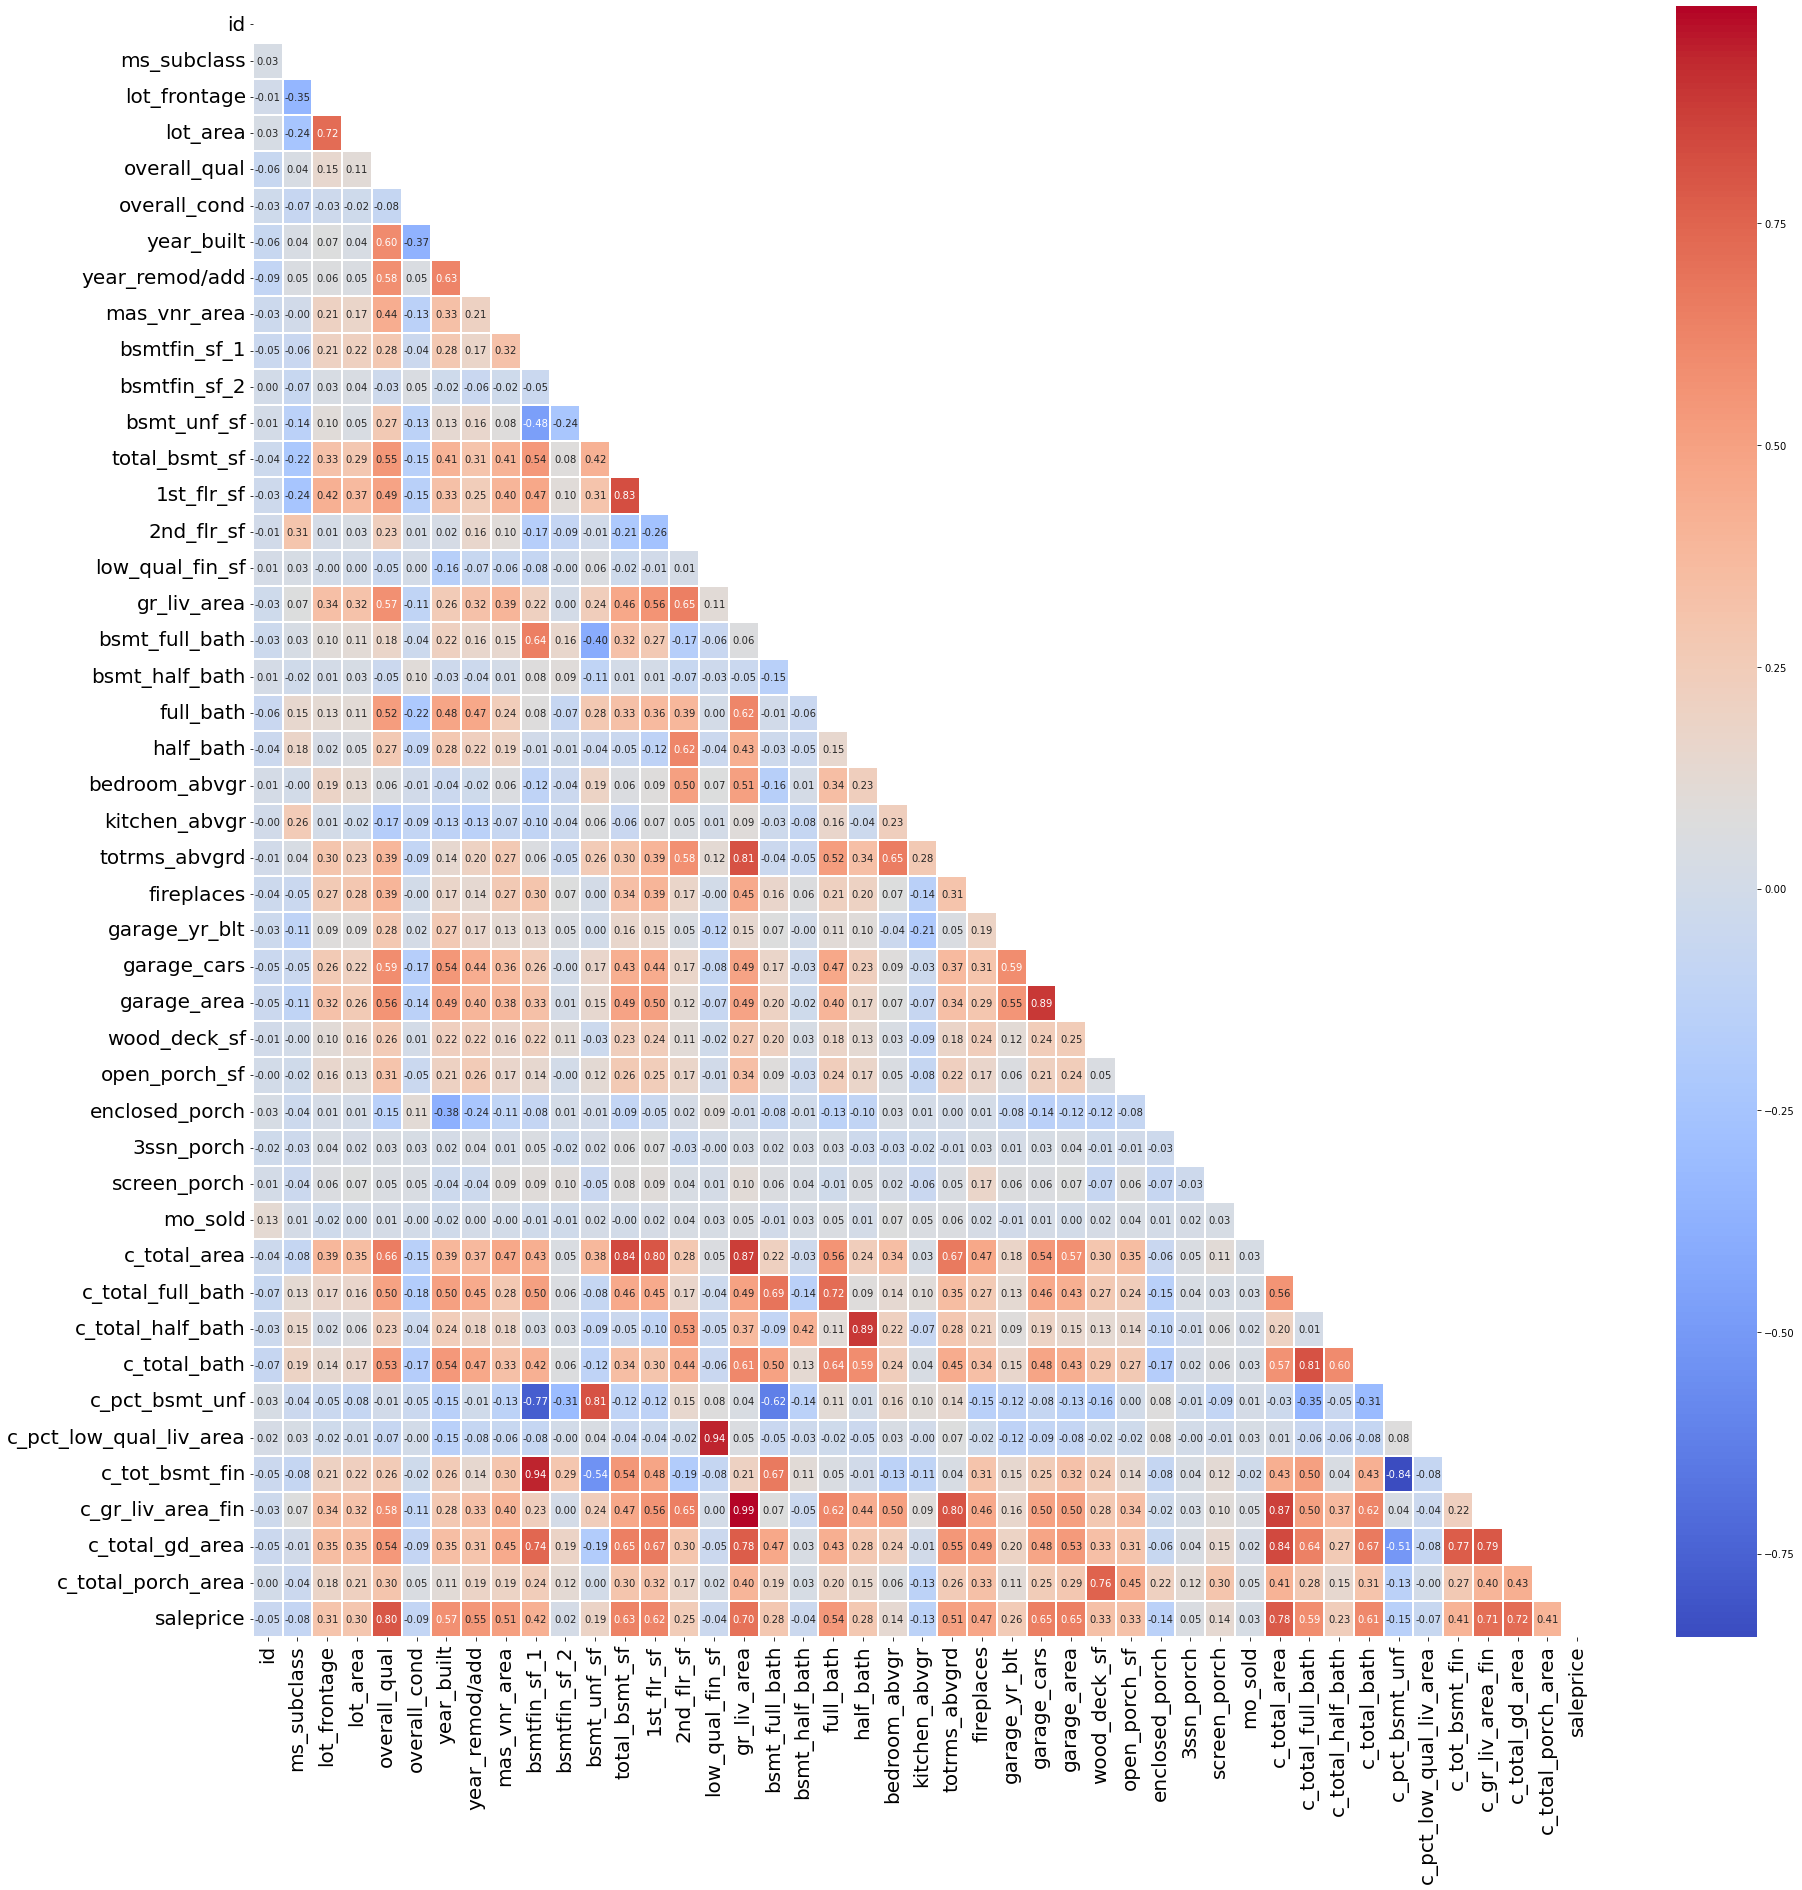

In [47]:
#heatmap for non-object features to sale price
mask = np.zeros_like(train_final.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30,30))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.heatmap(
    train_final.corr(),
    cmap='coolwarm',
    annot=True,
    fmt = ".2f",
    mask = mask,
    linewidth = 0.3)

**_Numerical features linear correlation_**

In [48]:
#Check on which features have stronger corr.
train_final.corr()['saleprice'].sort_values(ascending = False)

saleprice                  1.000000
overall_qual               0.799806
c_total_area               0.779894
c_total_gd_area            0.719676
c_gr_liv_area_fin          0.707514
gr_liv_area                0.699161
garage_area                0.648288
garage_cars                0.646664
total_bsmt_sf              0.632749
1st_flr_sf                 0.623236
c_total_bath               0.608521
c_total_full_bath          0.588018
year_built                 0.571580
year_remod/add             0.549137
full_bath                  0.538274
mas_vnr_area               0.512351
totrms_abvgrd              0.505183
fireplaces                 0.471053
bsmtfin_sf_1               0.423834
c_tot_bsmt_fin             0.411803
c_total_porch_area         0.405548
wood_deck_sf               0.329381
open_porch_sf              0.326261
lot_frontage               0.311338
lot_area                   0.295911
bsmt_full_bath             0.284012
half_bath                  0.279115
garage_yr_blt              0

<AxesSubplot:>

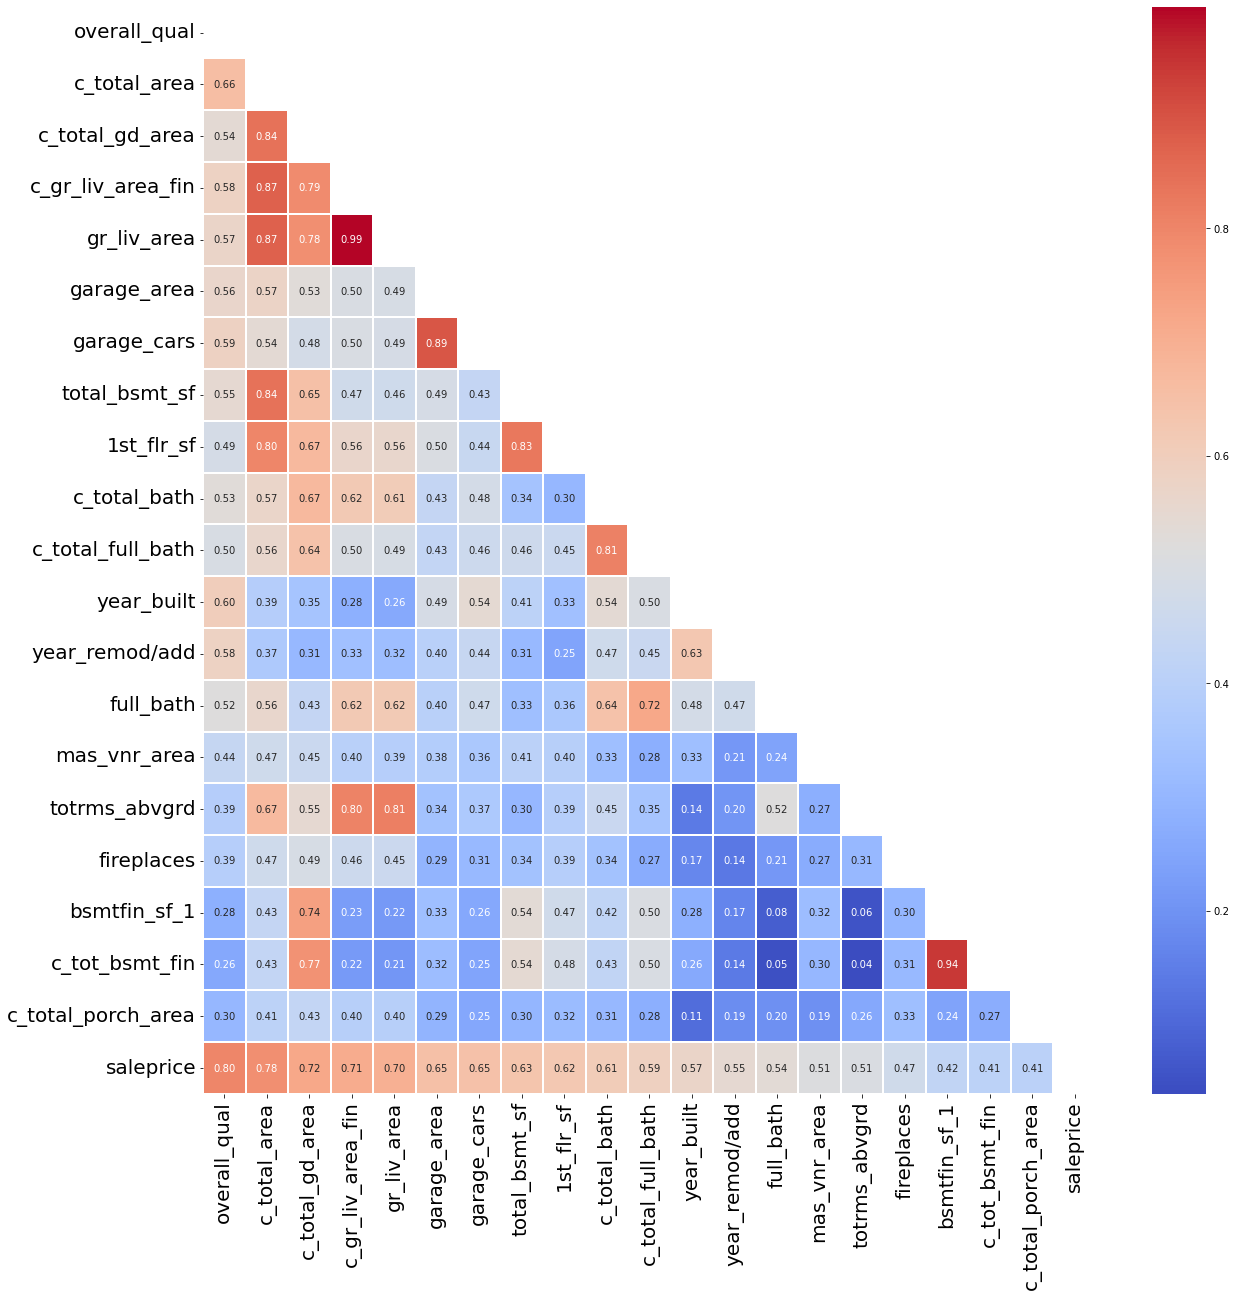

In [49]:
#heatmap for non-object features to sale price for corr. >0.4
mask = np.zeros_like(train_final.loc[:,['overall_qual',
 'c_total_area',
 'c_total_gd_area',
 'c_gr_liv_area_fin',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'c_total_bath',
 'c_total_full_bath',
 'year_built',
 'year_remod/add',
 'full_bath',
 'mas_vnr_area',
 'totrms_abvgrd',
 'fireplaces',
 'bsmtfin_sf_1',
 'c_tot_bsmt_fin','c_total_porch_area','saleprice']].corr())

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.heatmap(
    train_final.loc[:,['overall_qual',
 'c_total_area',
 'c_total_gd_area',
 'c_gr_liv_area_fin',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'c_total_bath',
 'c_total_full_bath',
 'year_built',
 'year_remod/add',
 'full_bath',
 'mas_vnr_area',
 'totrms_abvgrd',
 'fireplaces',
 'bsmtfin_sf_1',
 'c_tot_bsmt_fin','c_total_porch_area','saleprice']].corr(),
    cmap='coolwarm',
    annot=True,
    fmt = ".2f",
    mask = mask,
    linewidth = 0.3) 


**Observations from heatmap plot and corr. value table**:
- Here we applied the pearson correlation to come up with a correlation matrix to determine the pairwise correlation of the features in the dataset to sale price. The figure above shows a zoomed in matrix to the features having >0.4 correlation coefficient with sale price. 

#### _Numerical features scatterplot trends_

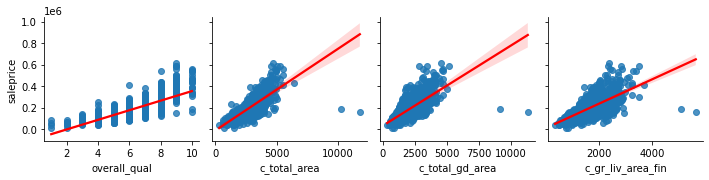

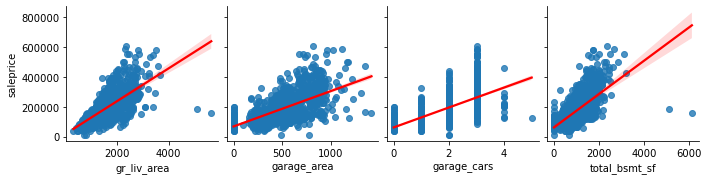

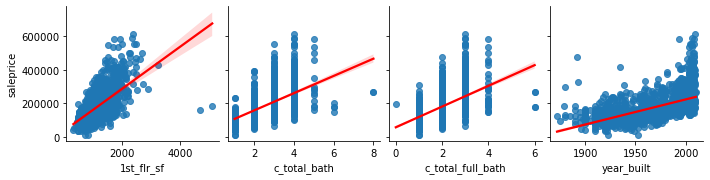

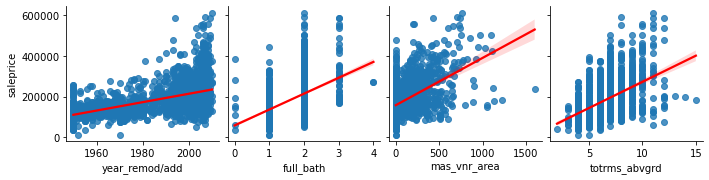

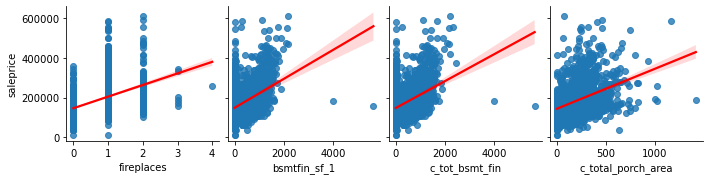

In [50]:
#scatterplot trends using snspair plot for features with correlation coefficient >0.4
sns.pairplot(train_final, y_vars=['saleprice'], x_vars=['overall_qual','c_total_area','c_total_gd_area','c_gr_liv_area_fin',],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final, y_vars=['saleprice'], x_vars=['gr_liv_area','garage_area','garage_cars','total_bsmt_sf',],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final, y_vars=['saleprice'], x_vars=[ '1st_flr_sf','c_total_bath','c_total_full_bath','year_built'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final, y_vars=['saleprice'], x_vars=['year_remod/add','full_bath','mas_vnr_area','totrms_abvgrd',],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final, y_vars=['saleprice'], x_vars=['fireplaces','bsmtfin_sf_1','c_tot_bsmt_fin','c_total_porch_area'],kind='reg', plot_kws={'line_kws':{'color':'red'}})


**Observations from pairplot**:
- Features are generally positively correlated to sale prices. 
- However having a strong correlation with sale price does not mean causation, and that’s where our model comes into play, to enable us to select the core features with significant impact to sales price.

#### Create Histogram of all numerical columns with >0.4 correlation coefficient

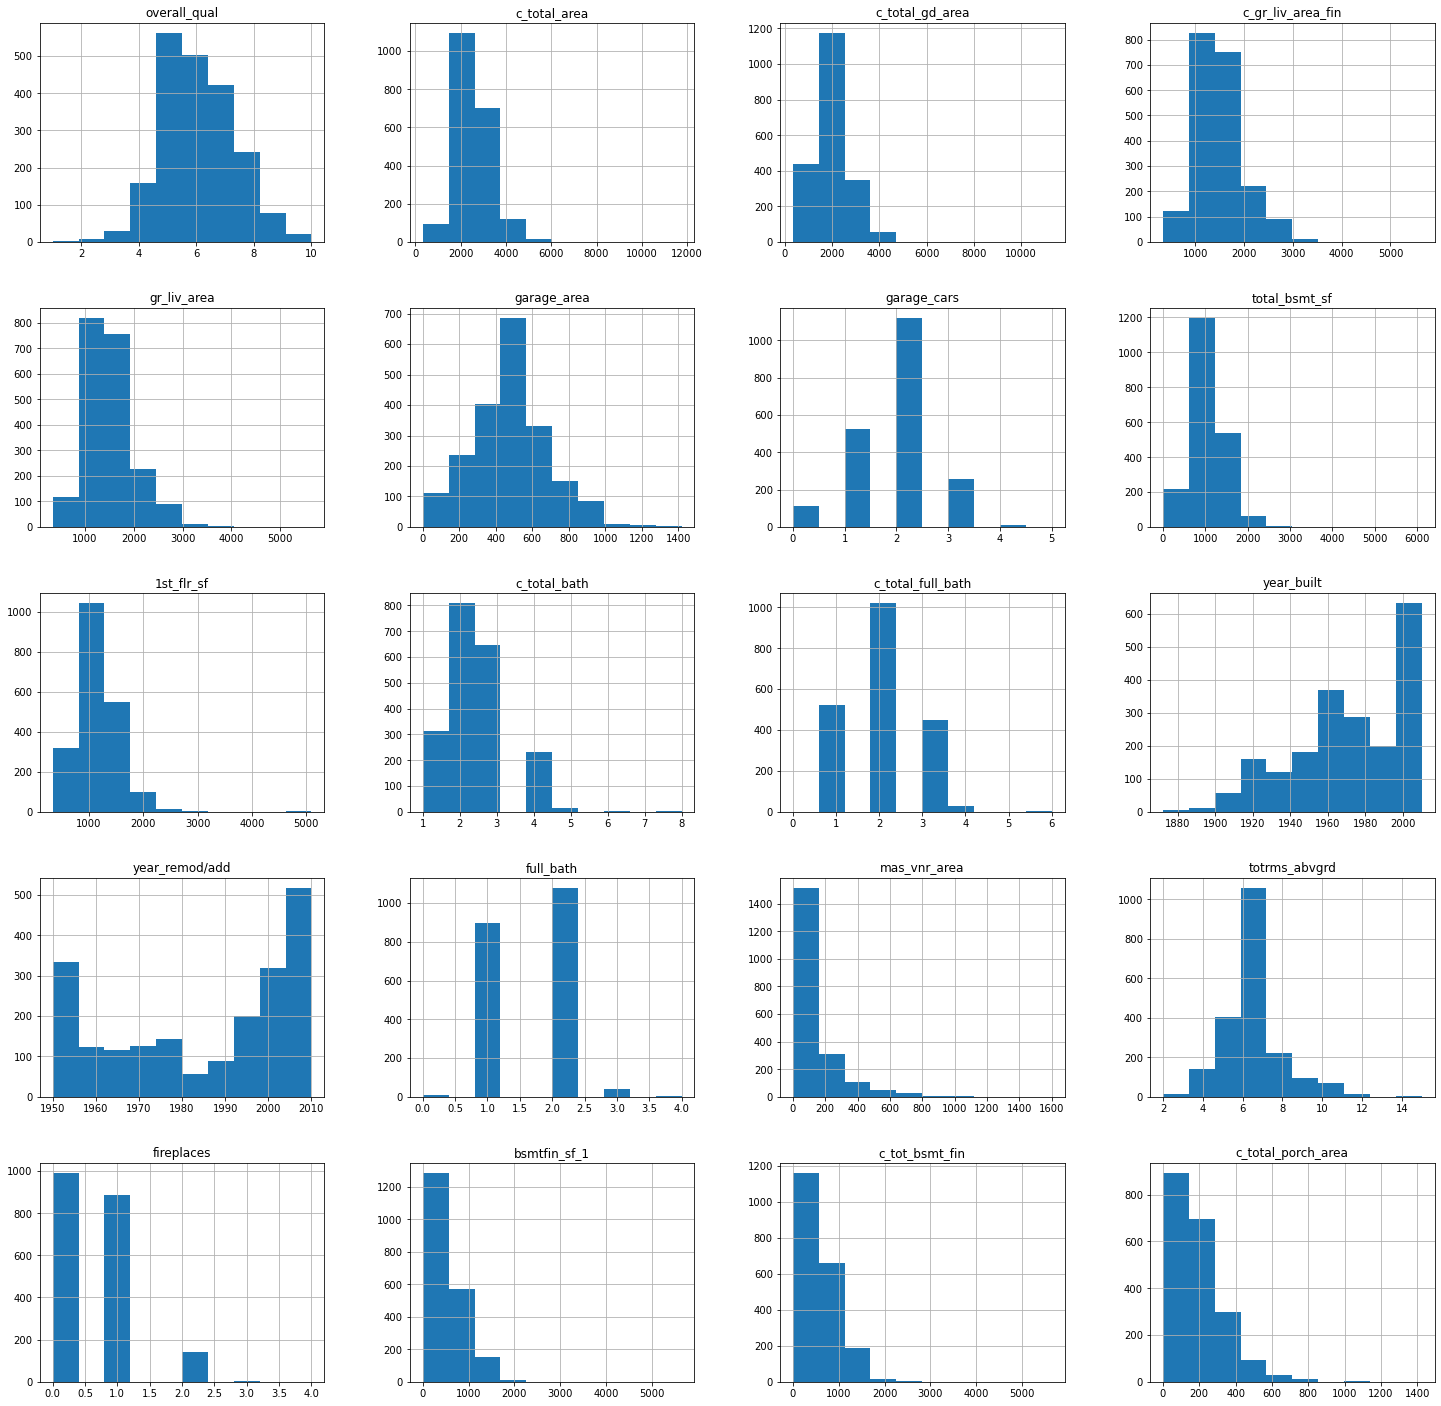

In [51]:
train_final.loc[:,['overall_qual',
 'c_total_area',
 'c_total_gd_area',
 'c_gr_liv_area_fin',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'c_total_bath',
 'c_total_full_bath',
 'year_built',
 'year_remod/add',
 'full_bath',
 'mas_vnr_area',
 'totrms_abvgrd',
 'fireplaces',
 'bsmtfin_sf_1',
 'c_tot_bsmt_fin','c_total_porch_area',]].hist(figsize=(25, 25));

**Observation from histogram plots:**
- Multiple variables do not follow a strong normal distribution, which might impact modelling accuracy, due to the following required assumptions:

- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)
- M - No Multicollinearity/Independence of Predictors

#### Categorical Features

#### _Categorical features boxplot_

In [52]:
#filtering out columns which are objects
cat_col = train_final.select_dtypes('object').columns.to_list()
bp_data = train_final[cat_col]
bp_data.insert(len(bp_data.columns), "saleprice", train_final["saleprice"])

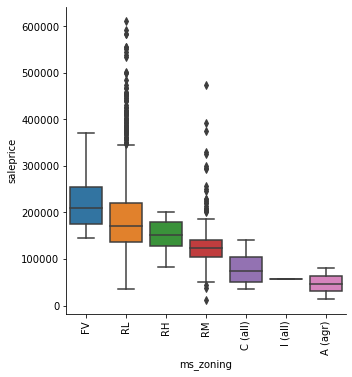

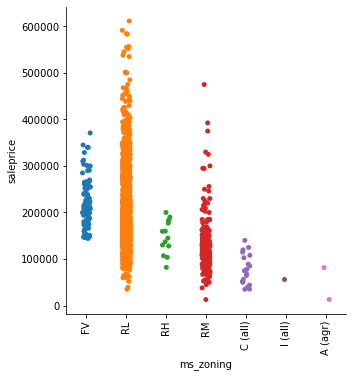

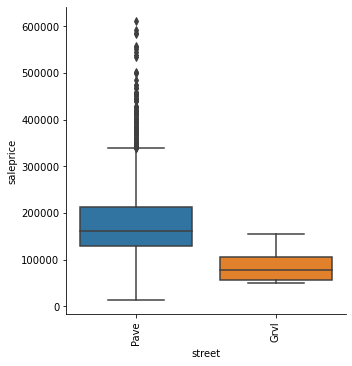

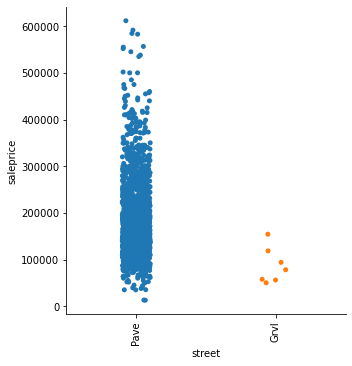

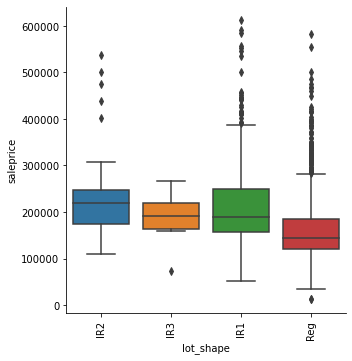

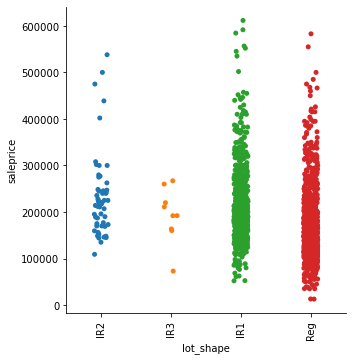

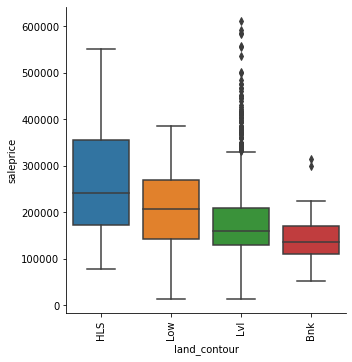

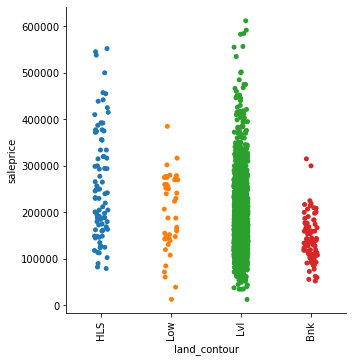

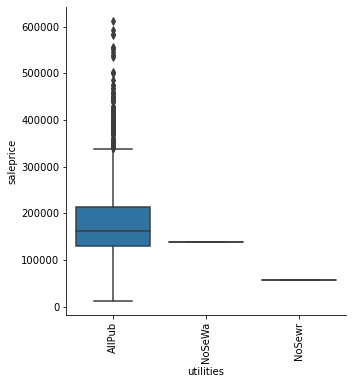

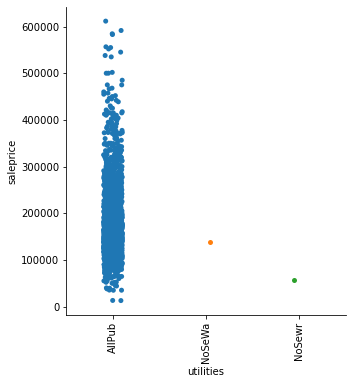

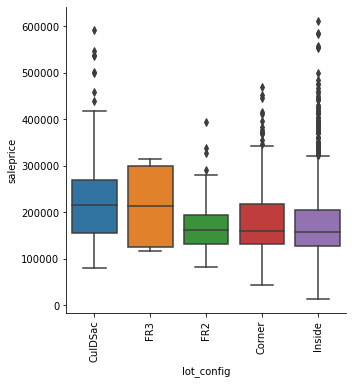

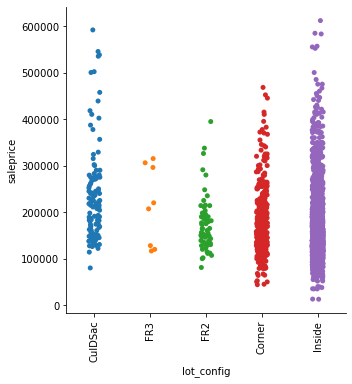

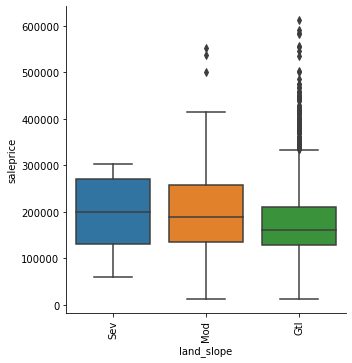

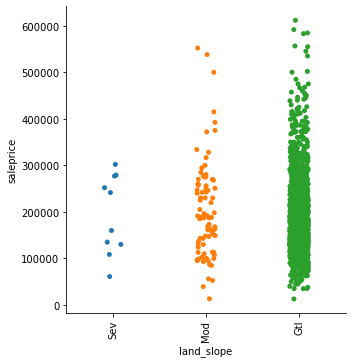

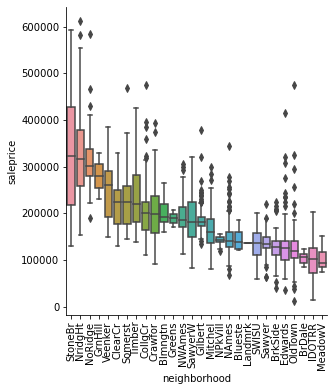

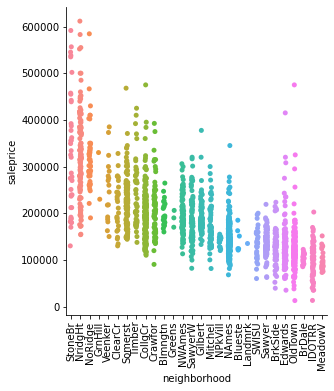

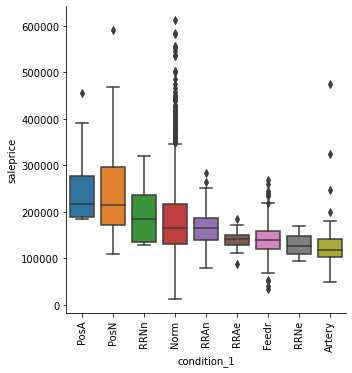

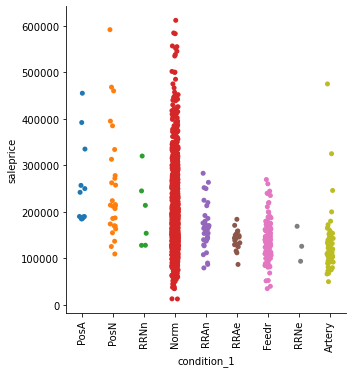

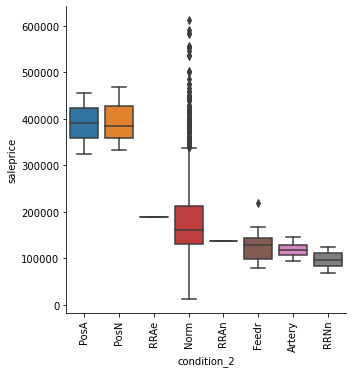

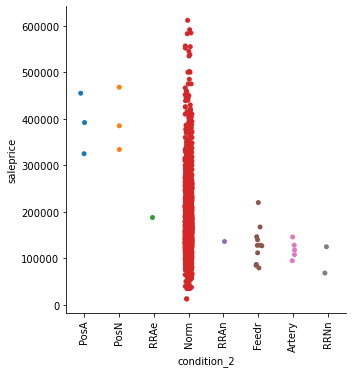

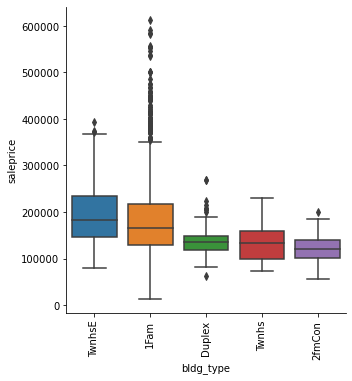

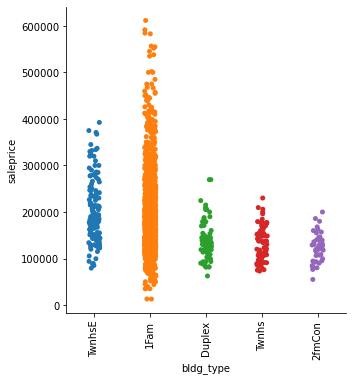

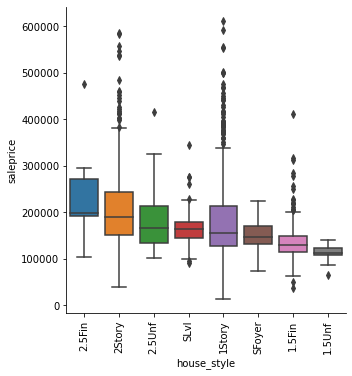

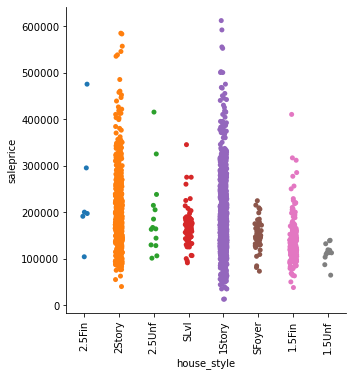

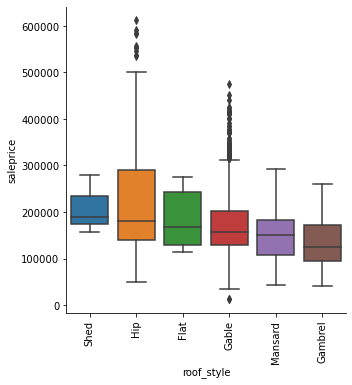

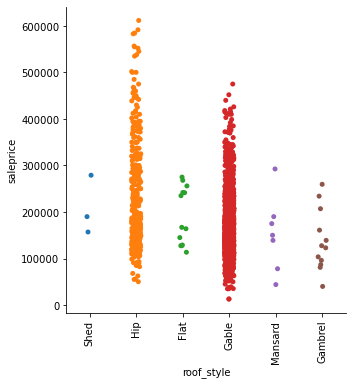

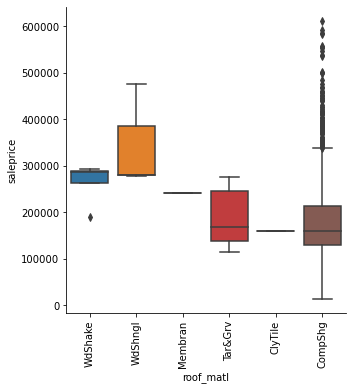

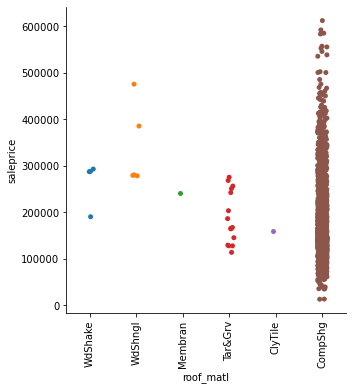

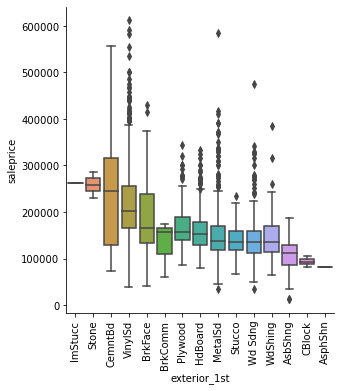

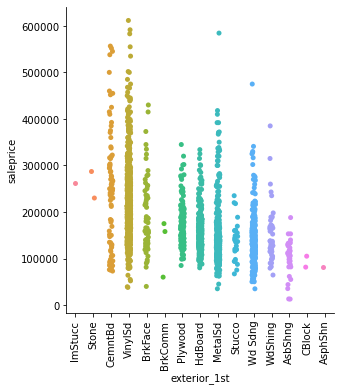

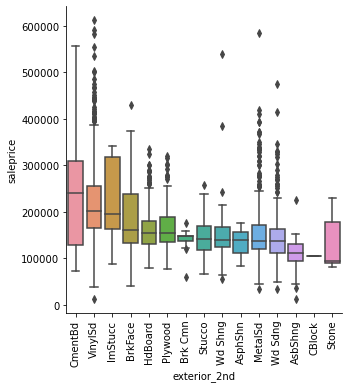

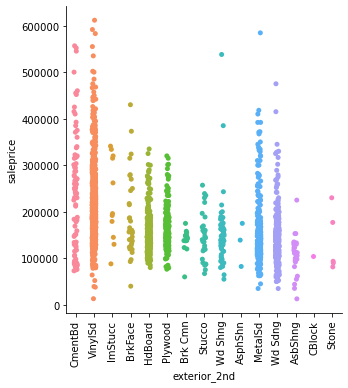

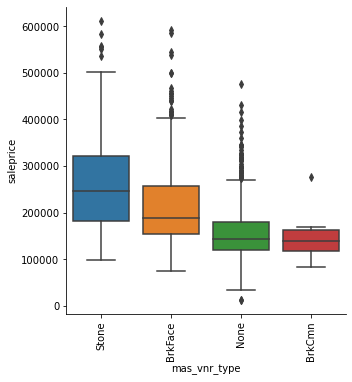

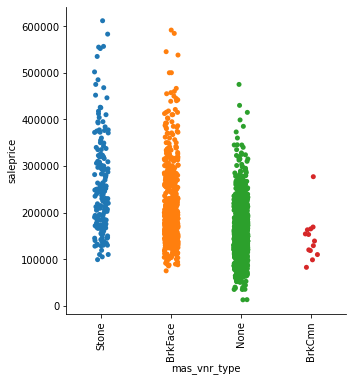

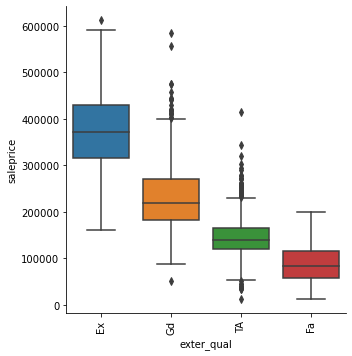

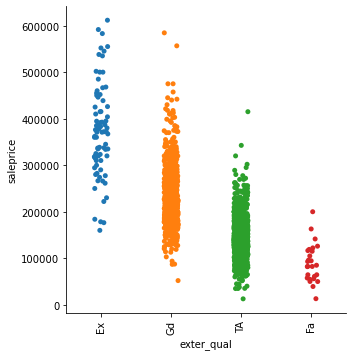

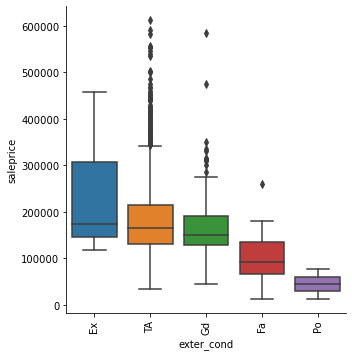

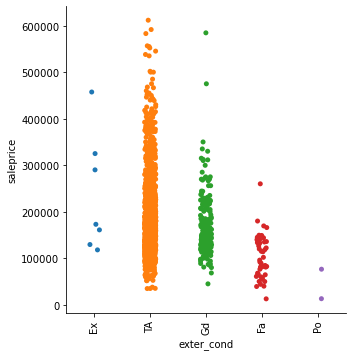

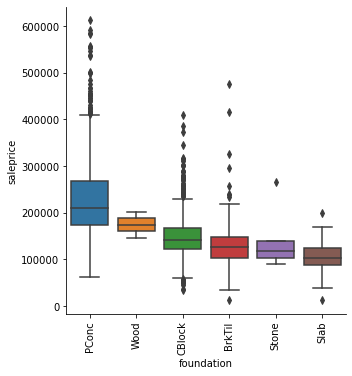

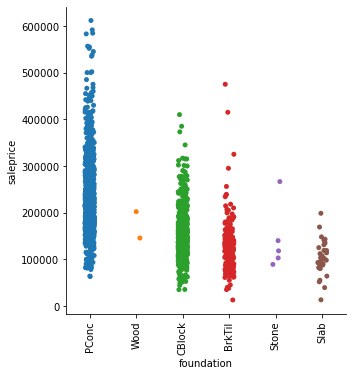

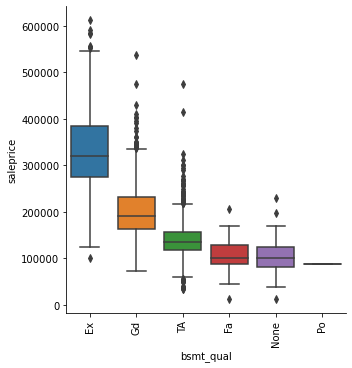

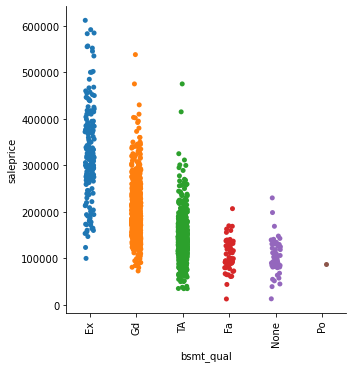

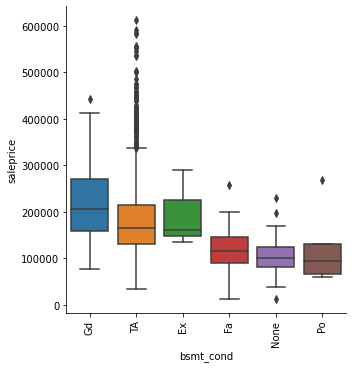

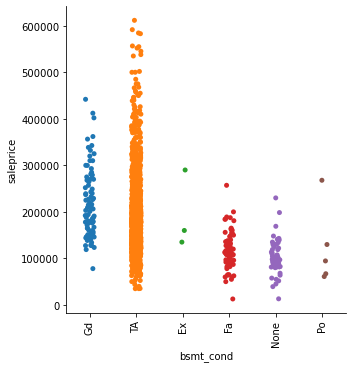

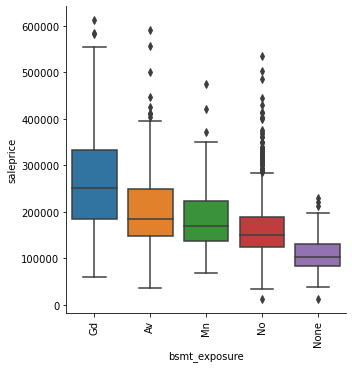

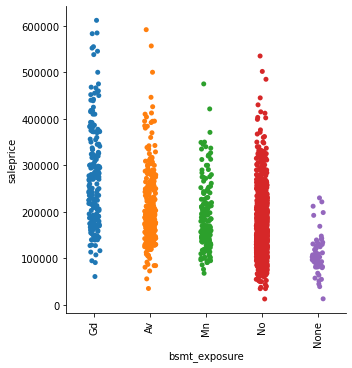

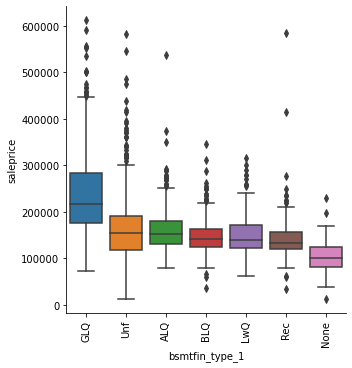

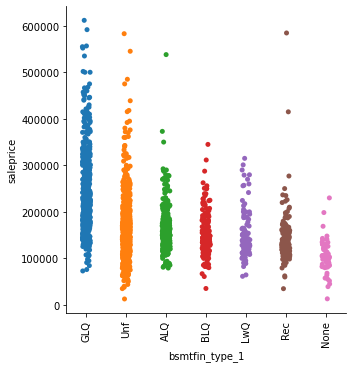

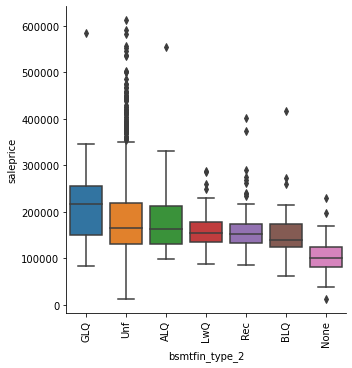

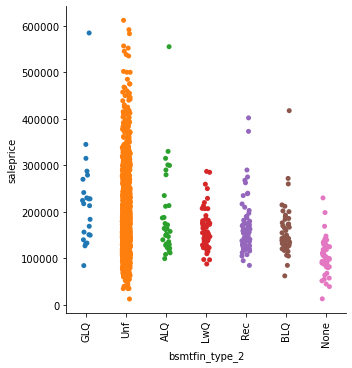

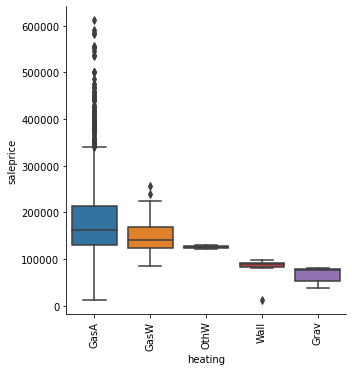

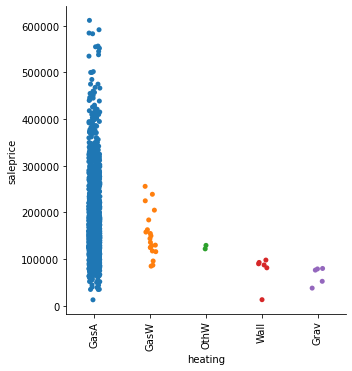

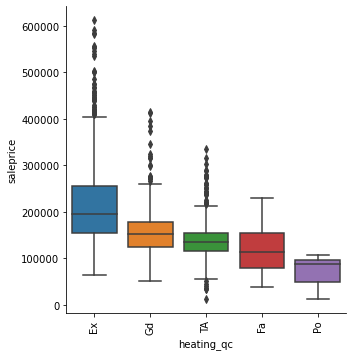

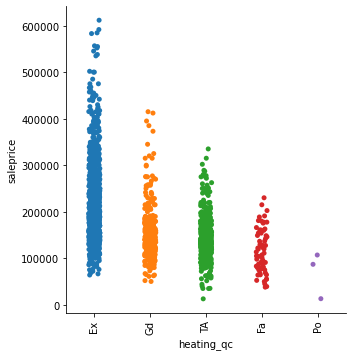

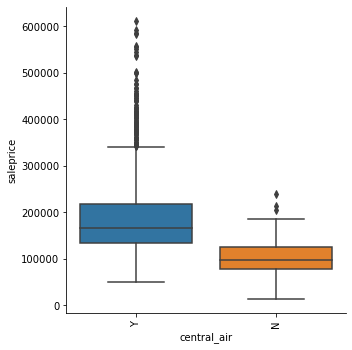

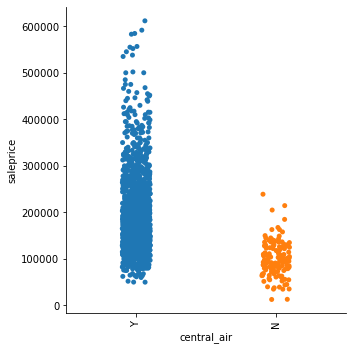

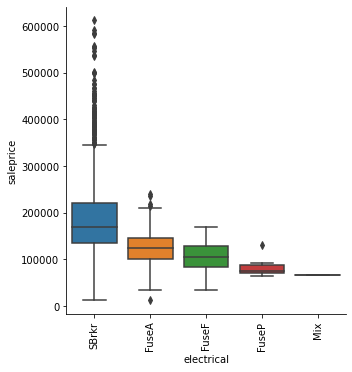

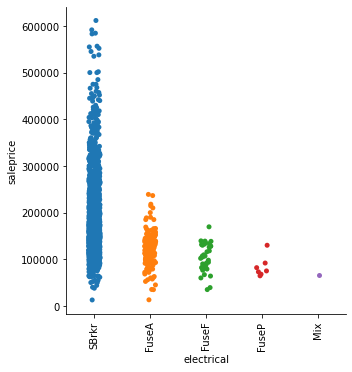

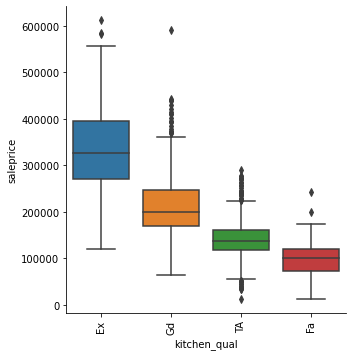

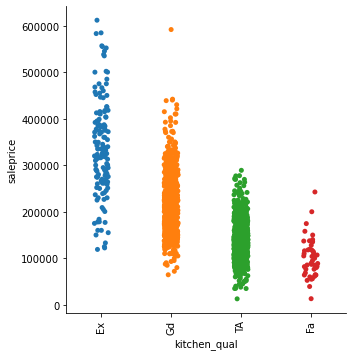

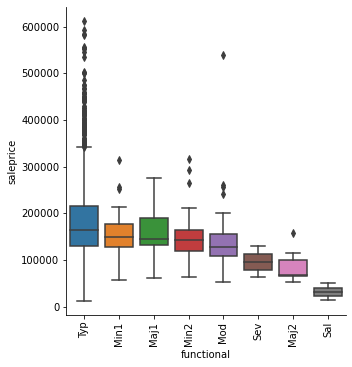

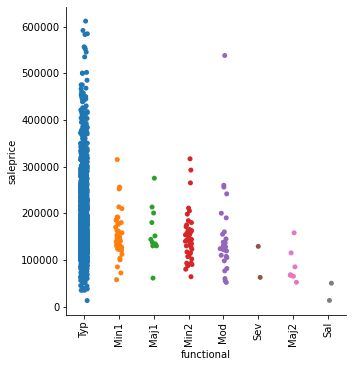

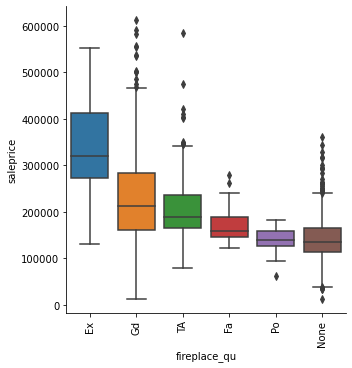

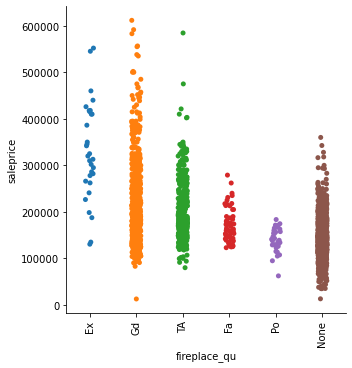

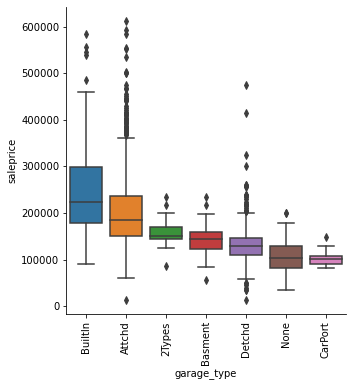

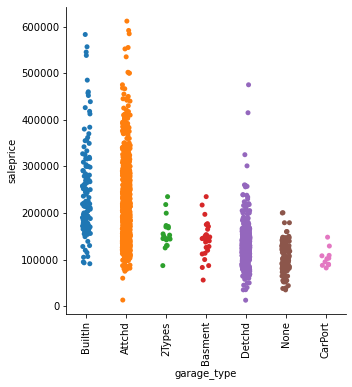

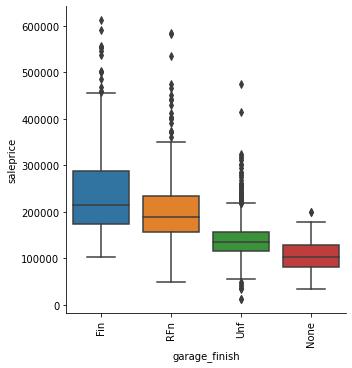

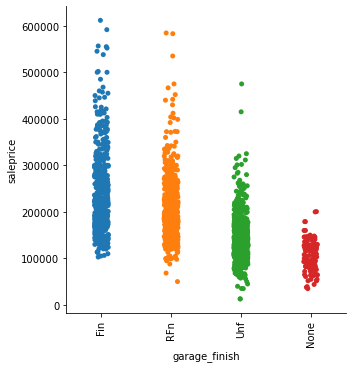

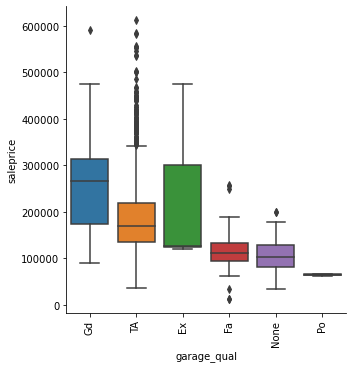

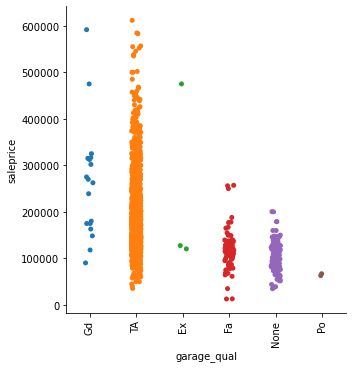

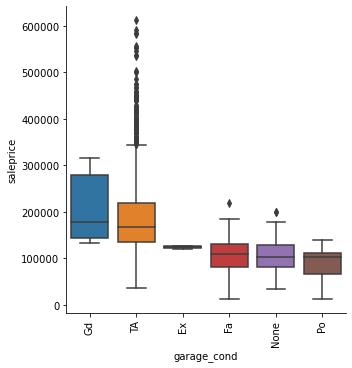

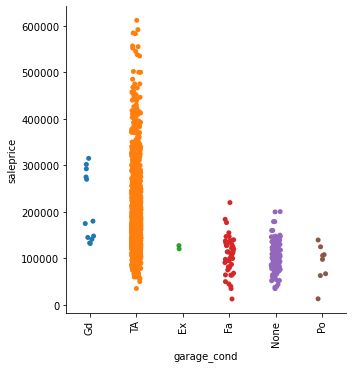

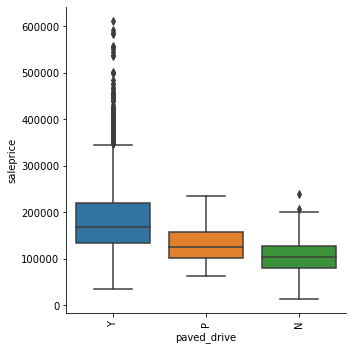

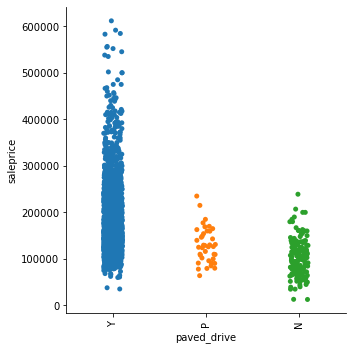

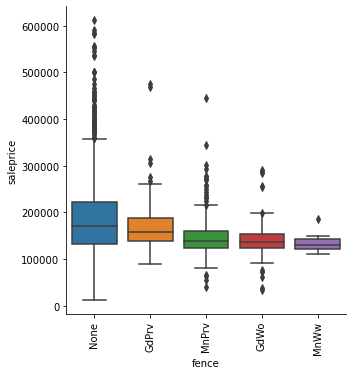

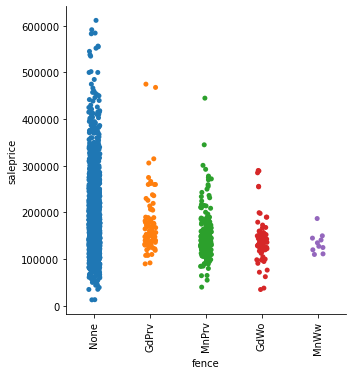

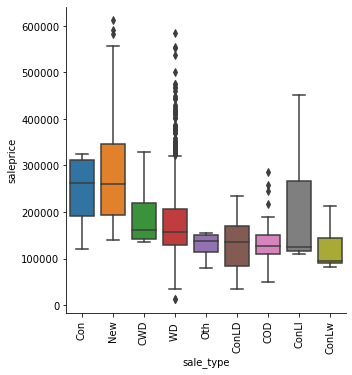

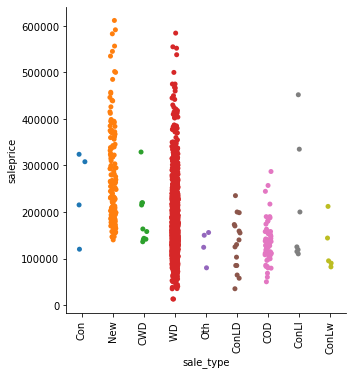

In [53]:
#Plot boxplot for categorical datatypes
for col in train_final[cat_col].columns:
    plot_order = bp_data.groupby(col)['saleprice'].median().sort_values(ascending=False).index.values
    sns.catplot(data = bp_data, x = col,y = "saleprice", kind = 'box', order = plot_order)
    plt.xticks(rotation = 90)
    sns.catplot(data = bp_data, x = col,y = "saleprice", kind = 'strip', order = plot_order)
    plt.xticks(rotation = 90)

**Observations from Boxplot/Strip plot**
- Multiple categorical types are actually ordinal variables. To convert to numerical form for ordinal variables for further verification on correlation.
- Categorical types with poor boxplot/strip trend due to presence of under-represented values in the feature or similar median performance across values
- Example: "ms_zoning","street","lot_shape","land_contour","utilities","lot_config","land_slope","bldg_type","house_style","roof_style","roof_matl","heating","garage_type","fence"

#### **_Recategorizing and changing into ordinal forms for categorical datatypes_**

In [54]:
#concatenate condition_1 and condition_2
train_final["c_condition_1_2"] = train_final["condition_1"].map(str)+ "_" + train_final["condition_2"].map(str)

In [55]:
#concatenate exterior_1st and exterior_2nd
train_final["c_exterior_1_2"] = train_final["exterior_1st"].map(str)+ "_" + train_final["exterior_2nd"].map(str)

In [56]:
#change to ordinal format for exter_qual
rate = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
train_final["c_ord_exter_qual"] = train_final["exter_qual"].map(rate)

In [57]:
#change to ordinal format for exter_cond
train_final["c_ord_exter_cond"] = train_final["exter_cond"].map(rate)

In [58]:
#total ordinal values for exter_cond and qual
train_final["c_tot_exter"] = train_final["c_ord_exter_qual"] + train_final["c_ord_exter_cond"]

In [59]:
#change to ordinal format for bsmt_qual
train_final["c_ord_bsmt_qual"] = train_final["bsmt_qual"].map(rate)

In [60]:
#change to ordinal format for bsmt_cond
train_final["c_ord_bsmt_cond"] = train_final["bsmt_cond"].map(rate)

In [61]:
#change to ordinal format for bsmt_exposure
rate_1 = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
train_final["c_ord_bsmt_exp"] = train_final["bsmt_exposure"].map(rate_1)

In [62]:
#total ordinal values for bsmt_cond, qual, exposure
train_final["c_tot_bsmt"] = train_final["c_ord_bsmt_qual"]+train_final["c_ord_bsmt_cond"]+train_final["c_ord_bsmt_exp"]

In [63]:
#change to ordinal format for bsmtfin_type_1
rate_2 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, "Unf": 1, "None": 0}
train_final["c_ord_bsmtfin_type_1"] = train_final["bsmtfin_type_1"].map(rate_2)

In [64]:
#change to ordinal format for bsmtfin_type_2
train_final["c_ord_bsmtfin_type_2"] = train_final["bsmtfin_type_2"].map(rate_2)

In [65]:
#total ordinal value for bsmtfin_type 1 and 2
train_final["c_ord_bsmtfin_type_tot"] = train_final["c_ord_bsmtfin_type_1"]+train_final["c_ord_bsmtfin_type_2"]

In [66]:
#change to ordinal format for heating_qc
train_final["c_ord_heating_qc"] = train_final["heating_qc"].map(rate)

In [67]:
#change to ordinal for electrical, however only categorize into 2 category as observed major difference between SBrkr vs the rest
train_final["c_ord_electrical"]= np.where(train_final["electrical"] == "SBrkr",1,0)

In [68]:
#change to ordinal format for kitchen_qual
train_final["c_ord_kitchen_qual"] = train_final["kitchen_qual"].map(rate)

In [69]:
#change to ordinal for functional, however only categorize into 2 category as observed major difference between Typical functionality vs the rest
train_final["c_ord_functional"]= np.where(train_final["functional"] == "Typ",1,0)

In [70]:
#change to ordinal format for fireplace_qu
train_final["c_ord_fireplace_qu"] = train_final["fireplace_qu"].map(rate)

In [71]:
#change to ordinal format for garage_qual
train_final["c_ord_garage_qual"] = train_final["garage_qual"].map(rate)

In [72]:
#change to ordinal format for garage_finish
rate_3 = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
train_final["c_ord_garage_finish"] = train_final["garage_finish"].map(rate_3)

In [73]:
#change to ordinal format for garage_cond
train_final["c_ord_garage_cond"] = train_final["garage_cond"].map(rate)

In [74]:
#total ordinal value for garage qual,finish,cond
train_final["c_ord_garage_tot"] = train_final["c_ord_garage_qual"]+train_final["c_ord_garage_finish"]+train_final["c_ord_garage_cond"]

In [75]:
#change to ordinal format for paved_drive
rate_4 = {'Y': 3, 'P': 2, 'N': 1}
train_final["c_ord_paved_drive"] = train_final["paved_drive"].map(rate_4)

In [76]:
#re-categorize sale_type
rate_4 = {'WD ': 'WD', 'CWD': 'WD', 'VWD': 'WD', 'New': 'New', 
          'COD': 'Oth', 'Con':'Oth','ConLw':'Oth','ConLI': 'Oth',
         'ConLD':'Oth','Oth':'Oth'}
train_final["c_sale_type"] = train_final["sale_type"].map(rate_4)

train_final.head()

id  ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0  109           60        RL     80.809046     13517   Pave       IR1   
1  544           60        RL     43.000000     11492   Pave       IR1   
2  153           20        RL     68.000000      7922   Pave       Reg   
3  318           60        RL     73.000000      9802   Pave       Reg   
4  255           50        RL     82.000000     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc  ... enclosed_porch  \
0        192.0          725.0    GasA         Ex  ...              0   
1        276.0          913.0    GasA         Ex  ...              0   
2        326.0         1057.0    GasA         TA  ...              0   
3        384.0          384.0    GasA         Gd  ...              0   
4        676.0          676.0    GasA         TA  ...              0   

  3ssn_porch  screen_porch  fence  mo_sold  sale_type  c_total_area  \
0          0             0   None        3        WD         2204.0   
1          0             0   None        4        WD         3035.0   
2          0             0   None        1        WD         2114.0   
3          0             0   None        4        WD         1828.0   
4          0             0   None        3        WD         2121.0   

   c_total_full_bath  c_total_half_bath  c_total_bath  c_pct_bsmt_unf  \
0                2.0                1.0           3.0        0.264828   
1                3.0                1.0           4.0        0.302300   
2                2.0                0.0           2.0        0.308420   
3                2.0                1.0           3.0        1.000000   
4                2.0     

#### **_Drop Old Categorical Columns (those converted to ordinal format and those with poor correlation)_**

In [77]:
#drop coverted columns
train_final1 = train_final.drop(["exter_qual","exter_cond","bsmt_qual","bsmt_cond","bsmt_exposure","bsmtfin_type_1","bsmtfin_type_2","heating_qc","electrical",
"kitchen_qual","functional","fireplace_qu","garage_qual","garage_finish","garage_cond","paved_drive"], axis = 1)

In [78]:
#drop categorical columns with poor correlation
train_final2 = train_final1.drop(["ms_zoning","street","lot_shape","land_contour","utilities","lot_config","land_slope","bldg_type","house_style","roof_style","roof_matl","heating","garage_type","fence"],axis = 1)

#move saleprice to the end
column_to_move_1 = train_final2.pop("saleprice")
train_final2.insert(len(train_final2.columns), "saleprice", column_to_move_1)

#### **_2nd check on correlation for numerical features (after converting categorical features to ordinal)_**

In [79]:
#2nd check on which features have stronger corr.
train_final2.corr()['saleprice'].sort_values(ascending = False)

saleprice                  1.000000
overall_qual               0.799806
c_total_area               0.779894
c_total_gd_area            0.719676
c_ord_exter_qual           0.711639
c_gr_liv_area_fin          0.707514
gr_liv_area                0.699161
c_ord_kitchen_qual         0.690938
garage_area                0.648288
garage_cars                0.646664
total_bsmt_sf              0.632749
1st_flr_sf                 0.623236
c_ord_bsmt_qual            0.615091
c_tot_exter                0.610282
c_total_bath               0.608521
c_total_full_bath          0.588018
year_built                 0.571580
c_tot_bsmt                 0.561870
c_ord_garage_finish        0.558315
year_remod/add             0.549137
full_bath                  0.538274
c_ord_fireplace_qu         0.536917
mas_vnr_area               0.512351
totrms_abvgrd              0.505183
fireplaces                 0.471053
c_ord_heating_qc           0.458110
c_ord_garage_tot           0.444358
c_ord_bsmt_exp             0

#### _Numerical features scatterplot trends_

In [80]:
#select columns which are int/float for sns plot from train_final2
display(train_final2.corr()['saleprice'].sort_values(ascending = False).index)

Index(['saleprice', 'overall_qual', 'c_total_area', 'c_total_gd_area',
       'c_ord_exter_qual', 'c_gr_liv_area_fin', 'gr_liv_area',
       'c_ord_kitchen_qual', 'garage_area', 'garage_cars', 'total_bsmt_sf',
       '1st_flr_sf', 'c_ord_bsmt_qual', 'c_tot_exter', 'c_total_bath',
       'c_total_full_bath', 'year_built', 'c_tot_bsmt', 'c_ord_garage_finish',
       'year_remod/add', 'full_bath', 'c_ord_fireplace_qu', 'mas_vnr_area',
       'totrms_abvgrd', 'fireplaces', 'c_ord_heating_qc', 'c_ord_garage_tot',
       'c_ord_bsmt_exp', 'bsmtfin_sf_1', 'c_tot_bsmt_fin',
       'c_total_porch_area', 'c_ord_bsmtfin_type_1', 'wood_deck_sf',
       'open_porch_sf', 'c_ord_bsmtfin_type_tot', 'lot_frontage', 'lot_area',
       'c_ord_paved_drive', 'c_ord_garage_qual', 'bsmt_full_bath', 'half_bath',
       'c_ord_garage_cond', 'garage_yr_blt', 'c_ord_electrical', '2nd_flr_sf',
       'c_total_half_bath', 'c_ord_bsmt_cond', 'bsmt_unf_sf', 'bedroom_abvgr',
       'screen_porch', 'c_ord_functional',

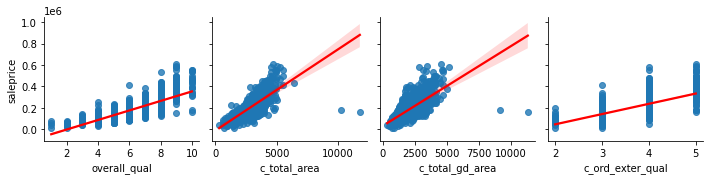

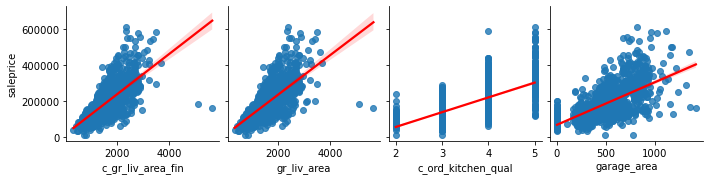

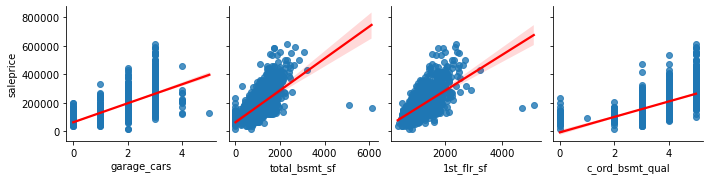

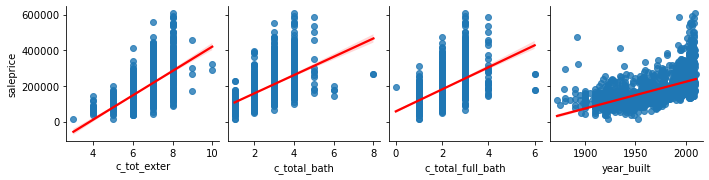

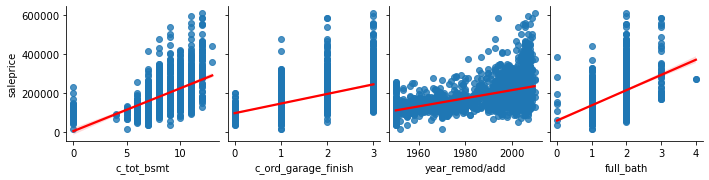

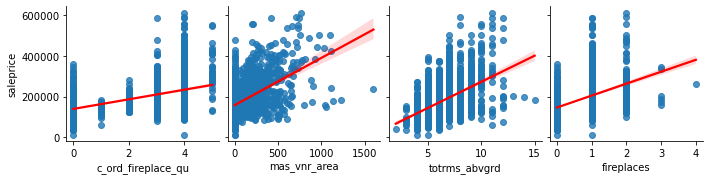

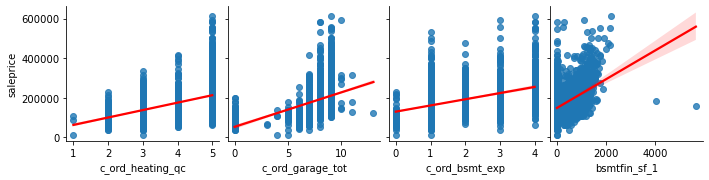

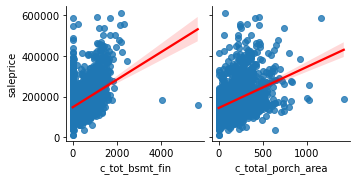

In [81]:
#scatterplot trends using snspair plot for train_final2 for features with corr. >0.4
sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['overall_qual', 'c_total_area', 'c_total_gd_area',
       'c_ord_exter_qual'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['c_gr_liv_area_fin', 'gr_liv_area',
       'c_ord_kitchen_qual', 'garage_area'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['garage_cars', 'total_bsmt_sf',
       '1st_flr_sf', 'c_ord_bsmt_qual'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['c_tot_exter', 'c_total_bath',
       'c_total_full_bath', 'year_built'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['c_tot_bsmt', 'c_ord_garage_finish',
       'year_remod/add', 'full_bath'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['c_ord_fireplace_qu', 'mas_vnr_area',
       'totrms_abvgrd', 'fireplaces'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['c_ord_heating_qc', 'c_ord_garage_tot',
       'c_ord_bsmt_exp', 'bsmtfin_sf_1'],kind='reg', plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(train_final2, y_vars=['saleprice'], x_vars=['c_tot_bsmt_fin',
       'c_total_porch_area',],kind='reg', plot_kws={'line_kws':{'color':'red'}})

### Feature Selection

#### _Drop features with R square values < 0.4_

In [82]:
#drop features with R square values <0.4
train_final3 = train_final2.drop(['c_ord_bsmtfin_type_1', 'wood_deck_sf',
       'open_porch_sf', 'c_ord_bsmtfin_type_tot', 'lot_frontage', 'lot_area',
       'c_ord_paved_drive', 'c_ord_garage_qual', 'bsmt_full_bath', 'half_bath',
       'c_ord_garage_cond', 'garage_yr_blt', 'c_ord_electrical', '2nd_flr_sf',
       'c_total_half_bath', 'c_ord_bsmt_cond', 'bsmt_unf_sf', 'bedroom_abvgr',
       'screen_porch', 'c_ord_functional', '3ssn_porch', 'c_ord_exter_cond',
       'mo_sold', 'c_ord_bsmtfin_type_2', 'bsmtfin_sf_2', 'low_qual_fin_sf',
       'bsmt_half_bath', 'c_pct_low_qual_liv_area', 'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch', 'c_pct_bsmt_unf','id'],axis = 1)

train_final3.corr()['saleprice'].sort_values(ascending = False)

saleprice              1.000000
overall_qual           0.799806
c_total_area           0.779894
c_total_gd_area        0.719676
c_ord_exter_qual       0.711639
c_gr_liv_area_fin      0.707514
gr_liv_area            0.699161
c_ord_kitchen_qual     0.690938
garage_area            0.648288
garage_cars            0.646664
total_bsmt_sf          0.632749
1st_flr_sf             0.623236
c_ord_bsmt_qual        0.615091
c_tot_exter            0.610282
c_total_bath           0.608521
c_total_full_bath      0.588018
year_built             0.571580
c_tot_bsmt             0.561870
c_ord_garage_finish    0.558315
year_remod/add         0.549137
full_bath              0.538274
c_ord_fireplace_qu     0.536917
mas_vnr_area           0.512351
totrms_abvgrd          0.505183
fireplaces             0.471053
c_ord_heating_qc       0.458110
c_ord_garage_tot       0.444358
c_ord_bsmt_exp         0.426833
bsmtfin_sf_1           0.423834
c_tot_bsmt_fin         0.411803
c_total_porch_area     0.405548
Name: sa

#### _Heatmap to check on multicollinearity relationship between features (other than saleprice)_

<AxesSubplot:>

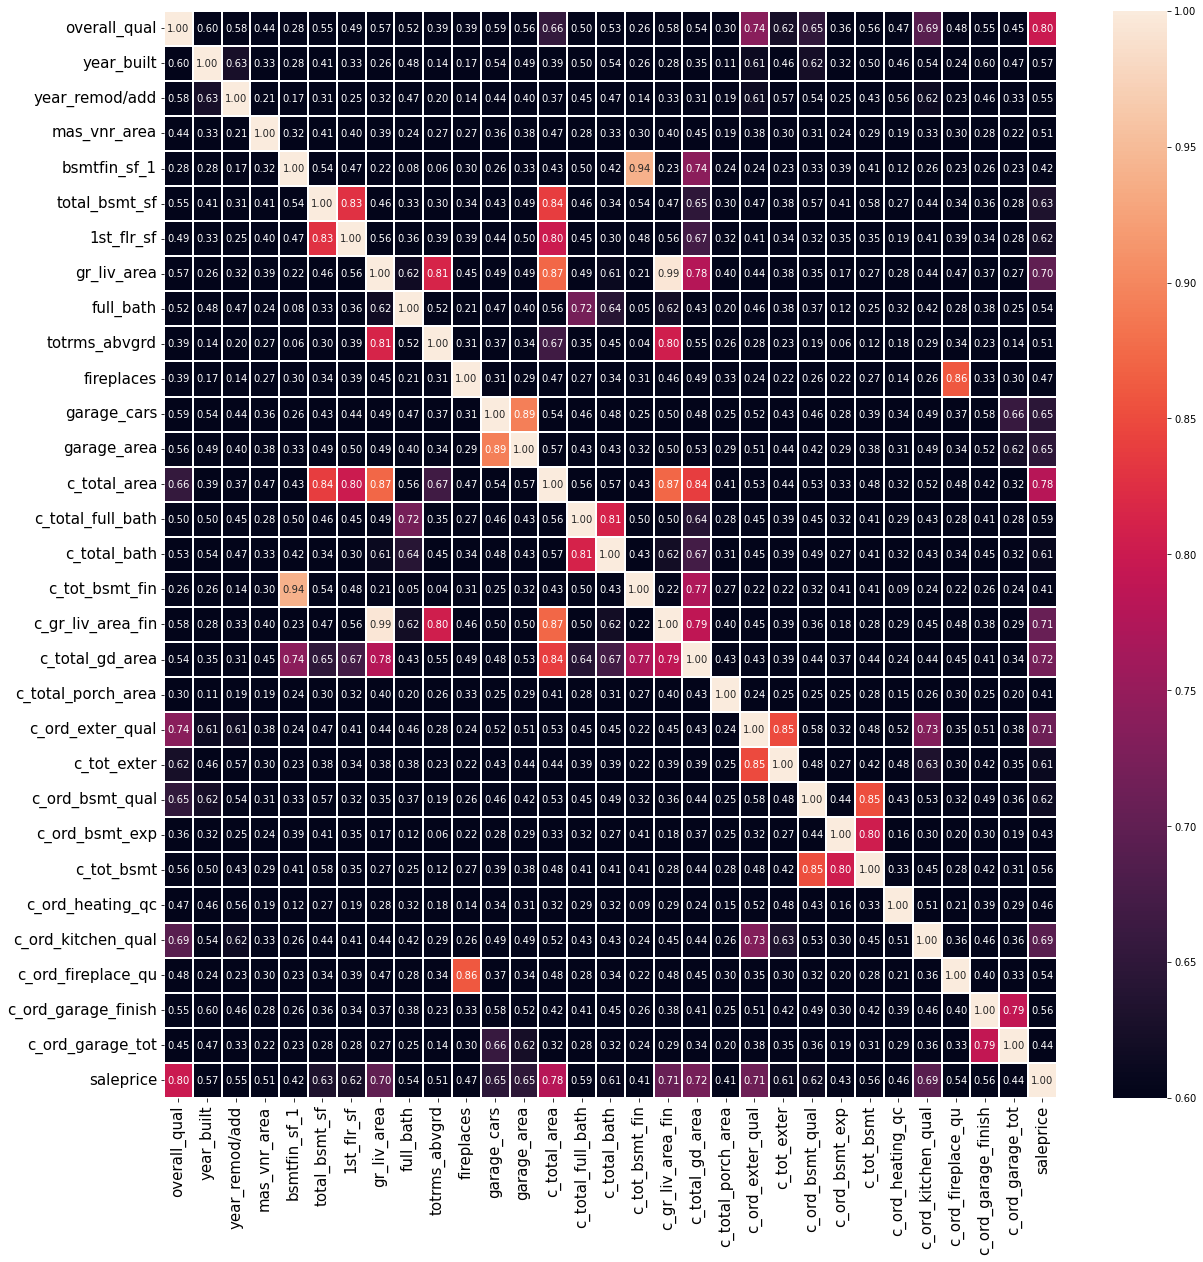

In [83]:
#heatmap to check for linear relationship between features (other than saleprice)
plt.figure(figsize=(20,20))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.heatmap(
    train_final3.corr(),
    cmap='rocket',
    annot=True,
    fmt = ".2f",
    linewidth = 0.3,
    vmin = 0.6,
    vmax = 1 )

**Comments**:
Identifying features with correlation coefficient values greater than their correlation with sale price:  

**overall_qual**          0.799806 
- strong correlation with:
  - c_ord_exter_qual       0.711639, 0.74
  - c_ord_kitchen_qual     0.690938, 0.69
  - c_ord_bsmt_qual        0.615091, 0.65

**c_total_area**           0.779894
- strong correlation with:
  - c_gr_liv_area_fin      0.707514 (0.87)
  - c_total_gd_area        0.719676 (0.84)
  - gr_liv_area            0.699161 (0.87)
  - 1st_flr_sf             0.623236 (0.80)
  - total_bsmt_sf          0.632749 (0.84)
  - totrms_abvgrd          0.505183 (0.67)

**garage_area**            0.648288
- strong correlation with:
  - garage_cars            0.646664 (0.89)

**c_tot_exter**            0.610282

**c_total_bath**           0.608521
- strong correlation with:
  - c_total_full_bath      0.588018 (0.81)
  - full_bath              0.538274 (0.64)

**year_built**             0.571580
- strong correlation with:
  - year_remod/add         0.549137 (0.63)

**c_tot_bsmt**             0.561870
- strong correlation with:
  - c_ord_bsmt_exp         0.426833 (0.80)

**c_ord_garage_finish**    0.558315
- strong correlation with:
  - c_ord_garage_tot       0.444358 (0.79)

**c_ord_fireplace_qu**     0.536917
- strong correlation with:
  - fireplaces             0.471053 (0.86)

**mas_vnr_area**           0.512351

**c_ord_heating_qc**       0.458110

**bsmtfin_sf_1**           0.423834
- strong correlation with:
  - c_tot_bsmt_fin         0.411803 (0.94)

**c_total_porch_area**     0.405548

#### Drop features with strong multicollinearity with other features (other than saleprice)

In [84]:
#drop those feature with strong linear correlationship with other features (other than saleprice)
train_final4 = train_final3.drop(["c_ord_exter_qual","c_ord_kitchen_qual",
                                  "c_ord_bsmt_qual","c_gr_liv_area_fin",
                                  "c_total_gd_area","gr_liv_area","1st_flr_sf",
                                  "total_bsmt_sf","totrms_abvgrd","garage_cars",
                                 "c_total_full_bath","full_bath","year_remod/add",
                                 "c_ord_bsmt_exp","c_ord_garage_tot","fireplaces",
                                  "c_tot_bsmt_fin"],axis=1)
train_final4.corr()['saleprice'].sort_values(ascending = False)

saleprice              1.000000
overall_qual           0.799806
c_total_area           0.779894
garage_area            0.648288
c_tot_exter            0.610282
c_total_bath           0.608521
year_built             0.571580
c_tot_bsmt             0.561870
c_ord_garage_finish    0.558315
c_ord_fireplace_qu     0.536917
mas_vnr_area           0.512351
c_ord_heating_qc       0.458110
bsmtfin_sf_1           0.423834
c_total_porch_area     0.405548
Name: saleprice, dtype: float64

#### _Boxplot for remaining categorical features_

In [85]:
#filtering out columns which are objects from train_final4
cat_col_1 = train_final4.select_dtypes('object').columns.to_list()
bp_data_1 = train_final4[cat_col_1]
bp_data_1.insert(len(bp_data_1.columns), "saleprice", train_final4["saleprice"])

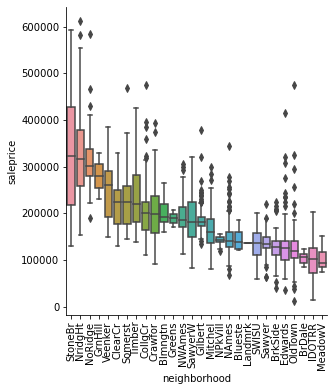

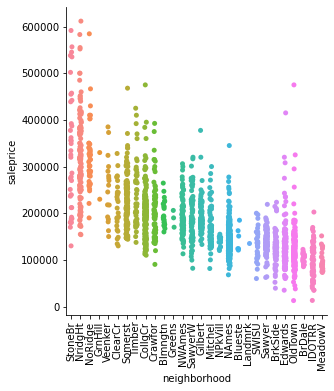

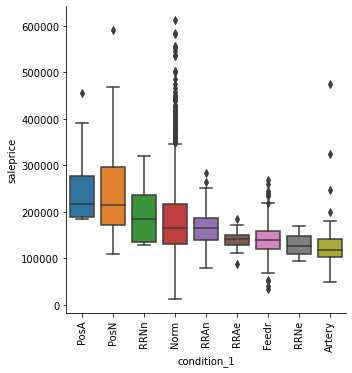

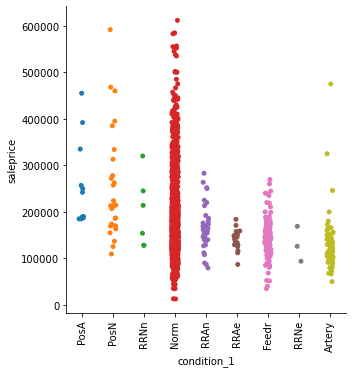

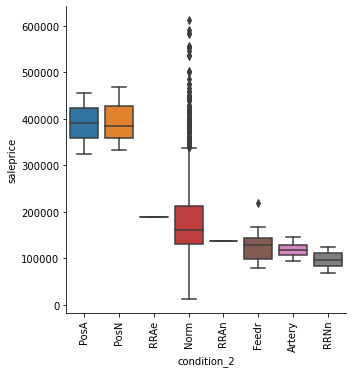

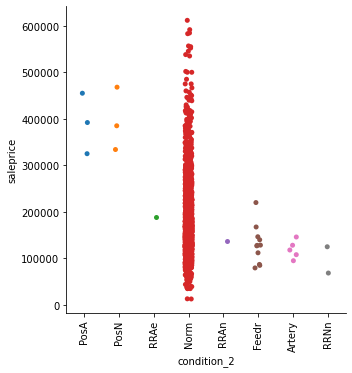

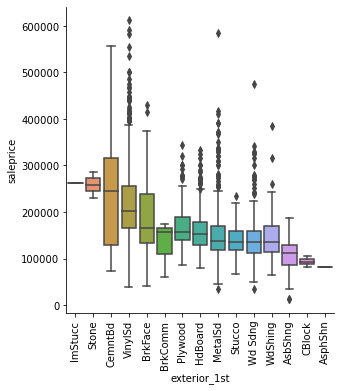

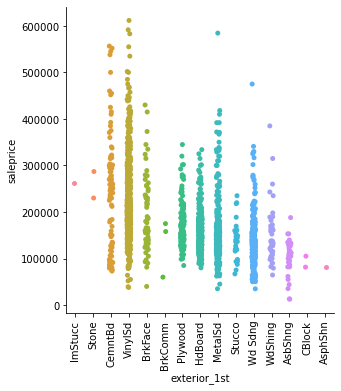

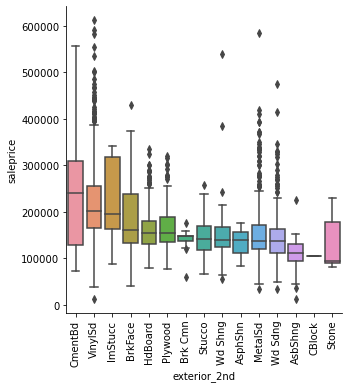

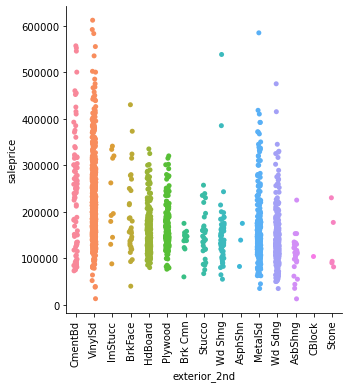

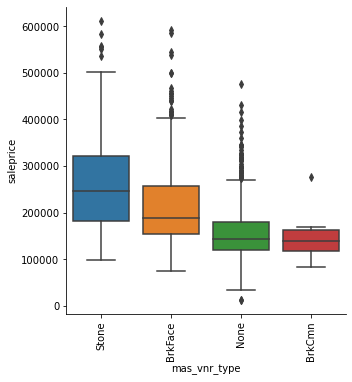

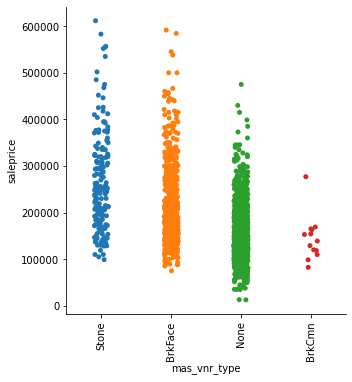

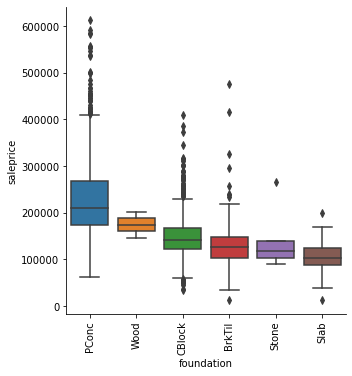

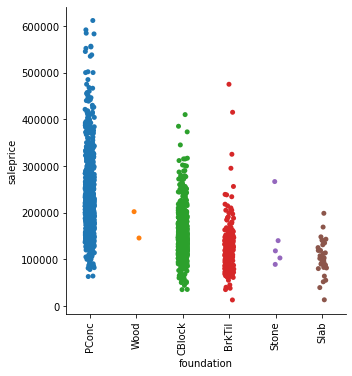

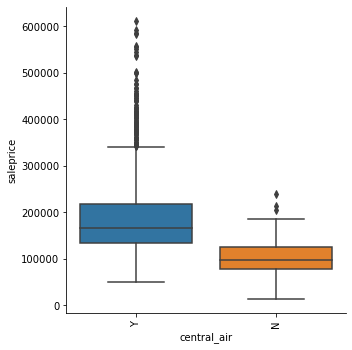

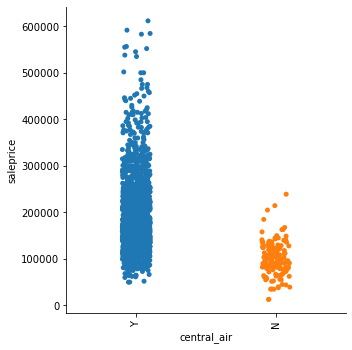

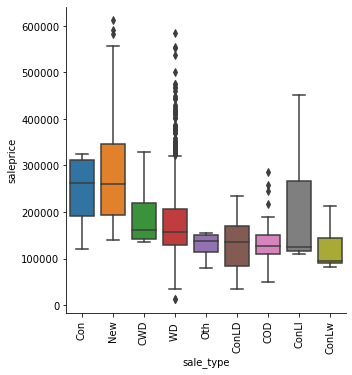

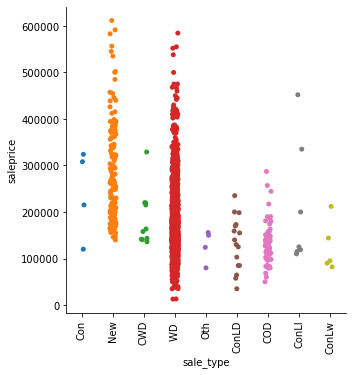

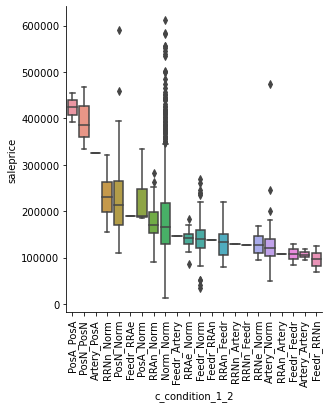

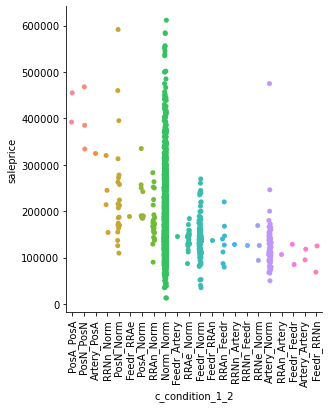

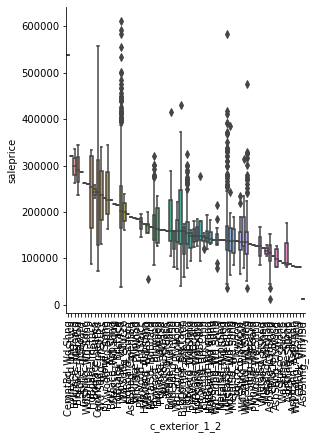

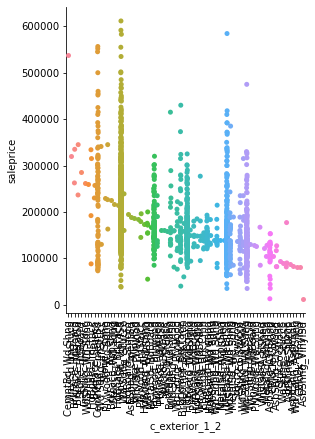

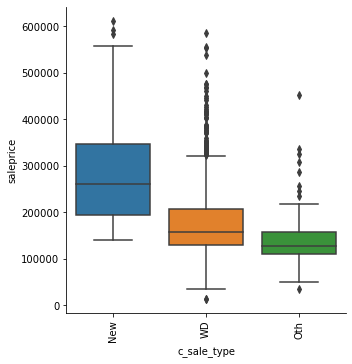

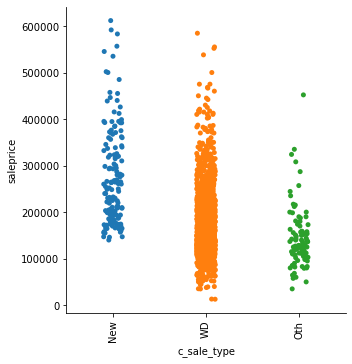

In [86]:
#Plot boxplot for categorical datatypes
for col in train_final4[cat_col_1].columns:
    plot_order = bp_data_1.groupby(col)['saleprice'].median().sort_values(ascending=False).index.values
    sns.catplot(data = bp_data_1, x = col,y = "saleprice", kind = 'box', order = plot_order)
    plt.xticks(rotation = 90)
    sns.catplot(data = bp_data_1, x = col,y = "saleprice", kind = 'strip', order = plot_order)
    plt.xticks(rotation = 90)

**Comments**
- Categorical features with observed stronger boxplot trend and expected influence to saleprice:
  - neighborhood
  - mas_vnr_type
  - central_air
  - c_sale_type

#### _Drop remaining categorical types with weaker boxplot trend_

In [87]:
#Drop remaining categorical types with weaker boxplot trend
train_final5 = train_final4.drop(['condition_1','condition_2','exterior_1st','exterior_2nd','sale_type',
                                  'c_condition_1_2','c_exterior_1_2',"foundation"], axis = 1)

train_final5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 0 to 2050
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         2025 non-null   object 
 1   overall_qual         2025 non-null   int64  
 2   year_built           2025 non-null   int64  
 3   mas_vnr_type         2025 non-null   object 
 4   mas_vnr_area         2025 non-null   float64
 5   bsmtfin_sf_1         2025 non-null   float64
 6   central_air          2025 non-null   object 
 7   garage_area          2025 non-null   float64
 8   c_total_area         2025 non-null   float64
 9   c_total_bath         2025 non-null   float64
 10  c_total_porch_area   2025 non-null   int64  
 11  c_tot_exter          2025 non-null   int64  
 12  c_tot_bsmt           2025 non-null   int64  
 13  c_ord_heating_qc     2025 non-null   int64  
 14  c_ord_fireplace_qu   2025 non-null   int64  
 15  c_ord_garage_finish  2025 non-null   i

**_Creating OHE dummies for categorical datatypes_**

In [88]:
#apply OneHotEncoder on categorical data
ohe = OneHotEncoder(sparse= False, handle_unknown='ignore')

In [89]:
#filtering out columns which are objects from train_final5
cat_col_2 = train_final5.select_dtypes('object').columns.to_list()
X_train_1 = train_final5[cat_col_2]

In [90]:
#fitting and transforming the dataset
ohe.fit(X_train_1)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [91]:
X_train_encoded = ohe.transform(X_train_1)

In [92]:
print(X_train_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [93]:
#extracting column names for the OHE array
column_name = ohe.get_feature_names_out(cat_col_2)

In [94]:
#creating dataframe
X_train_2 = pd.DataFrame(X_train_encoded,columns=column_name)

#### _Combine OHE values with dataset_

In [95]:
#attaching OHE data to dataframe
train_final6 = pd.concat([train_final5.reset_index(drop=True),X_train_2.reset_index(drop = True)], axis = 1)

In [96]:
# checking if there is any null values
train_final6.isnull().sum()

neighborhood            0
overall_qual            0
year_built              0
mas_vnr_type            0
mas_vnr_area            0
bsmtfin_sf_1            0
central_air             0
garage_area             0
c_total_area            0
c_total_bath            0
c_total_porch_area      0
c_tot_exter             0
c_tot_bsmt              0
c_ord_heating_qc        0
c_ord_fireplace_qu      0
c_ord_garage_finish     0
c_sale_type             0
saleprice               0
neighborhood_Blmngtn    0
neighborhood_Blueste    0
neighborhood_BrDale     0
neighborhood_BrkSide    0
neighborhood_ClearCr    0
neighborhood_CollgCr    0
neighborhood_Crawfor    0
neighborhood_Edwards    0
neighborhood_Gilbert    0
neighborhood_Greens     0
neighborhood_GrnHill    0
neighborhood_IDOTRR     0
neighborhood_Landmrk    0
neighborhood_MeadowV    0
neighborhood_Mitchel    0
neighborhood_NAmes      0
neighborhood_NPkVill    0
neighborhood_NWAmes     0
neighborhood_NoRidge    0
neighborhood_NridgHt    0
neighborhood

#### _Final dataset for selected features_

In [97]:
#drop object type columns
train_final7 = train_final6.drop(cat_col_2,axis = 1)

#move saleprice to the end
column_to_move_2 = train_final7.pop("saleprice")
train_final7.insert(len(train_final7.columns), "saleprice", column_to_move_2)
train_final7.head()

overall_qual  year_built  mas_vnr_area  bsmtfin_sf_1  garage_area  \
0             6        1976         289.0         533.0        475.0   
1             7        1996         132.0         637.0        559.0   
2             5        1953           0.0         731.0        246.0   
3             5        2006           0.0           0.0        400.0   
4             6        1900           0.0           0.0        484.0   

   c_total_area  c_total_bath  c_total_porch_area  c_tot_exter  c_tot_bsmt  \
0        2204.0           3.0                  44            7           7   
1        3035.0           4.0                  74            7           8   
2        2114.0           2.0                  52            7           7   
3        1828.0           3.0                 100            6           8   
4        2121.0           2.0                  59            6           7   

   c_ord_heating_qc  c_ord_fireplace_qu  c_ord_garage_finish  \
0                 5                   0                    2   
1                 5                   3                    2   
2                 3                   0                    1   
3                 4                   0                    3   
4                 3                   0                    1   

   neighborhood_Blmngtn  neighborhood_Blueste  neighborhood_BrDale  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                   0.0                   0.0                  0.0   

   neighborhood_BrkSide  neighborhood_ClearCr  neighborhood_CollgCr  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   neighborhood_Crawfor  neighborhood_Edwards  neighborhood_Gilbert  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   neighborhood_Greens  neighborhood_GrnHill  neighborhood_IDOTRR  \
0                  0.0                   0.0                  0.0   
1                  0.0                   0.0                  0.0   
2                  0.0                   0.0                  0.0   
3                  0.0                   0.0                  0.0   
4                  0.0                   0.0                  0.0   

   neighborhood_Landmrk  neighborhood_MeadowV  neighborhood_Mitchel  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   neighborhood_NAmes  neighborhood_NPkVill  neighborhood_NWAmes  \
0                 0.0                   0.0                  0.0   
1                 0.0                   0.0                  0.0   
2                 1.0                   0.0                  0.0   
3                 0.0                   0.0                  0.0   
4                 0.0                   0.0                  0.0   

   neighborhood_NoRidge  neighborhood_NridgHt  neighborhood_OldTown  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0   

In [98]:
display(train_final7.corr()["saleprice"].sort_values(ascending = False))

saleprice               1.000000
overall_qual            0.799806
c_total_area            0.779894
garage_area             0.648288
c_tot_exter             0.610282
c_total_bath            0.608521
year_built              0.571580
c_tot_bsmt              0.561870
c_ord_garage_finish     0.558315
c_ord_fireplace_qu      0.536917
mas_vnr_area            0.512351
c_ord_heating_qc        0.458110
neighborhood_NridgHt    0.445301
bsmtfin_sf_1            0.423834
c_total_porch_area      0.405548
c_sale_type_New         0.352575
mas_vnr_type_Stone      0.315165
central_air_Y           0.277716
neighborhood_NoRidge    0.266872
mas_vnr_type_BrkFace    0.264785
neighborhood_StoneBr    0.260254
neighborhood_Somerst    0.144844
neighborhood_Timber     0.116254
neighborhood_Veenker    0.084609
neighborhood_CollgCr    0.084470
neighborhood_Crawfor    0.060116
neighborhood_ClearCr    0.053857
neighborhood_GrnHill    0.039421
neighborhood_NWAmes     0.036883
neighborhood_Blmngtn    0.025929
neighborho

In [99]:
#further drop features with <0.4 R-square values
train_final8 = train_final7.loc[:,['overall_qual','c_total_area','garage_area','c_tot_exter',
 'c_total_bath',
 'year_built',
 'c_tot_bsmt',
 'c_ord_garage_finish',
 'c_ord_fireplace_qu',
 'mas_vnr_area',
 'c_ord_heating_qc',
 'neighborhood_NridgHt',
 'bsmtfin_sf_1','c_total_porch_area', "saleprice"]]

train_final8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   overall_qual          2025 non-null   int64  
 1   c_total_area          2025 non-null   float64
 2   garage_area           2025 non-null   float64
 3   c_tot_exter           2025 non-null   int64  
 4   c_total_bath          2025 non-null   float64
 5   year_built            2025 non-null   int64  
 6   c_tot_bsmt            2025 non-null   int64  
 7   c_ord_garage_finish   2025 non-null   int64  
 8   c_ord_fireplace_qu    2025 non-null   int64  
 9   mas_vnr_area          2025 non-null   float64
 10  c_ord_heating_qc      2025 non-null   int64  
 11  neighborhood_NridgHt  2025 non-null   float64
 12  bsmtfin_sf_1          2025 non-null   float64
 13  c_total_porch_area    2025 non-null   int64  
 14  saleprice             2025 non-null   int64  
dtypes: float64(6), int64(

#### _Export csv for selected features_

In [100]:
train_final8.to_csv('../datasets/train_final8.csv', index=False)

## Model Prep

### Assembling Predictor Variables (X) and Target (y)

#### X, y variable

In [101]:
# Assembling predictor variable (X) - > 0.4 R square value, categorical values
X = train_final8.iloc[:,range(0,(len(train_final8.columns)-1))]

In [102]:
# y target variable
y = train_final8["saleprice"]

### Train/Test Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

### Instantiate Model

In [104]:
# Linear regression
lr = LinearRegression()

In [105]:
# Lasso
lasso = LassoCV(n_alphas=200)

In [106]:
# Ridge
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

### Cross Validation

In [107]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8121824146531633

In [108]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.7171102834688279

In [109]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.812101843259704

**Comments On Cross Validation Results**:

Through initial cross validation analysis on linear, lasso, ridge regression models, observe that linear regression model seems to be performing the best on train data, to move forward with that model for fitting and evaluation.

## Model Fitting & Evaluation

In [110]:
# Using ridge 
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
lr.score(X_train, y_train)

0.820747142392283

In [112]:
lr.score(X_test, y_test)

0.8230553300308139

In [113]:
print(f'MSE on training set: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'MSE on testing set: {mean_squared_error(y_test, lr.predict(X_test))}')

MSE on training set: 1120358230.5327783
MSE on testing set: 1104642817.0086248


In [114]:
print(f'R^2 on training set: {r2_score(y_train, lr.predict(X_train))}')
print(f'R^2 on testing set: {r2_score(y_test, lr.predict(X_test))}')

R^2 on training set: 0.820747142392283
R^2 on testing set: 0.8230553300308139


In [115]:
print(f'RMS on training set: {math.sqrt(mean_squared_error(y_train, lr.predict(X_train)))}')
print(f'RMS on testing set: {math.sqrt(mean_squared_error(y_test, lr.predict(X_test)))}')

RMS on training set: 33471.752725735445
RMS on testing set: 33236.167303234964


**Linear Regression Test & Train Set $R^2$/MSE/RMSE Value Comparison**

|Evaluation Metrics|Train|Test|
|---|---|---|
|**$R^2$**|0.82074|0.82306|
|**MSE**|1120358230|1104642817|
|**RMSE**|33471|33236|

**Comments on model's RMSE/MSE/$R^2$ values:** 
- Based on the RMSE/MSE/$R^2$, Lr model is performing relatively similar on both the test and train sets at ~82%. Hence it shows that there isn't overfitting/underfitting and that both test and train sets have almost the same model performance accuracy. Thus, this gives us confidence on having a similar accuracy of prediction on sales price for a new data set.

#### _Prediction Plot for X_test and y_test values_

Text(0.5, 0, 'Actual y_test Value')

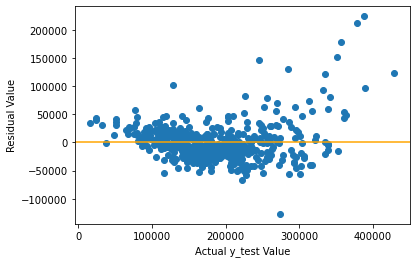

In [116]:
# Plot predictions (x-axis) against residuals (y-axis)
# Closer the scatter is to a horizontal line across zero, the better the model
pred = lr.predict(X_test)
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.axhline(0, color="orange")
plt.ylabel('Residual Value')
plt.xlabel('Actual y_test Value')

#### Comments on prediction plot
- Observe that sale price predictions for y_test values within the range of 0 to 300,000 is able to maintain a residual score of within +/- 50,000.
- However, for y_test values greater than 300,000, the observed predicted sale price is observed to have greater deviation from actual y_test values, of up to >200,000. 
- Thus what this means, is that the model is less accurate in predicting for the range of y_test values greater than 300,000. 

#### _Variable Importance Plot_

In [117]:
#finding coefficients of features significance
coeff = lr.coef_

In [118]:
# y intercept
lr.intercept_

-386393.7668940964

In [119]:
lr_list = train_final8.iloc[:,range(0,len(train_final8.columns)-1)].columns.to_list()
coeff_rate = pd.Series(lr.coef_, index= lr_list).sort_values(ascending = False)
coeff_rate

neighborhood_NridgHt    31582.288663
overall_qual            14275.235638
c_tot_exter              9641.944993
c_total_bath             6466.914739
c_ord_fireplace_qu       4410.807398
c_ord_heating_qc         3924.873818
c_ord_garage_finish      2206.414701
c_tot_bsmt               1649.652690
year_built                136.567559
garage_area                39.436711
c_total_porch_area         30.783826
c_total_area               23.823146
mas_vnr_area               22.515383
bsmtfin_sf_1                4.411526
dtype: float64

Text(0.5, 0, 'Feature')

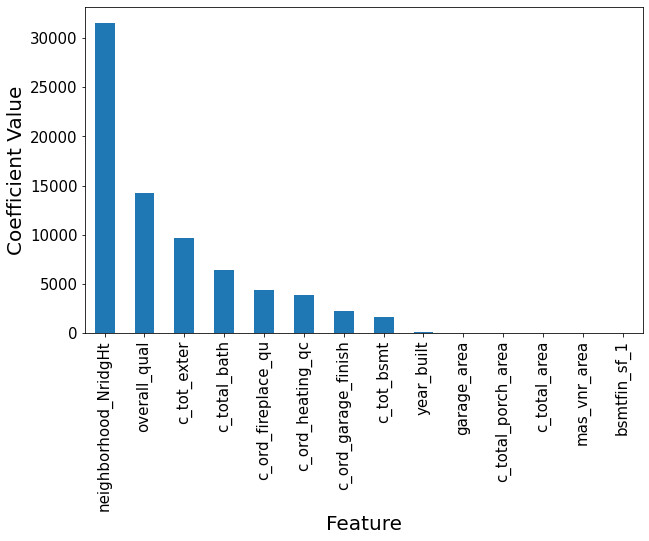

In [120]:
#plot significance of features
plt.figure(figsize = (10,6))
coeff_rate.plot(kind='bar')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Coefficient Value", fontsize = 20)
plt.xlabel("Feature",fontsize = 20)

**Comment on variable importance plot (feature coefficient):**
- Observe that the top 5 features with the greatest contributions to sale price are NridgHt neighbourhood, overall quality, total exterior (total exterior quality and condition), total bath and fireplace quality.
- Based on a Forbes report, some of the most desirable home features are,  location, flexible space, having high-end finishes. Link: 
https://www.forbes.com/sites/forbesrealestatecouncil/2020/04/27/15-most-desirable-home-features-to-todays-buyers/?sh=7997a5677a4e
- A home with better overall quality, total exterior quality and condition, and fireplace quality, would point to a home with high-end finishing, and thus take a spot in the top few features that contributes more to sales price.
- From the sale price against neighbourhood box plot, it can be observed that NridgHt neighbourhood location has the 2nd highest historical median sale price value. This means that the location is highly desired by buyers, and thus could explain its high positive contributions to saleprice. 

### Null Model

In [121]:
dummy_regr = DummyRegressor(strategy="mean")

In [122]:
dummy_regr.fit(X, y)

DummyRegressor()

In [123]:
dummy_regr.predict(X)

array([180852.95209877, 180852.95209877, 180852.95209877, ...,
       180852.95209877, 180852.95209877, 180852.95209877])

In [124]:
dummy_regr.score(X, y)
print(f'R^2 score for null model: {dummy_regr.score(X,y)}')

R^2 score for null model: 0.0


In [125]:
cross_val_score(dummy_regr, X, y, cv=5).mean()
print(f'Cross val score for null model: {cross_val_score(dummy_regr, X, y, cv=3).mean()}')

Cross val score for null model: -0.0015425188075431546


In [126]:
dummy_pred = dummy_regr.predict(X)
print(f'MSE for null model: {mean_squared_error(y, dummy_pred)}')
print(f'RMSE for null model: {np.sqrt(mean_squared_error(y, dummy_pred))}')

MSE for null model: 6253591180.505854
RMSE for null model: 79079.65086231637


### Lasso, Ridge Model MSE/RMSE Calculation

In [127]:
# fit models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [128]:
# scoring on train datasets
display(lasso.score(X_train, y_train))
display(ridge.score(X_train, y_train))

0.7289835800807537

0.820746587739948

In [129]:
# scoring on test datasets
display(lasso.score(X_test, y_test))
display(ridge.score(X_test, y_test))

0.7535935475145576

0.823029543899239

In [130]:
print(f'Lasso MSE on training set: {mean_squared_error(y_train, lasso.predict(X_train))}')
print(f'Lasso MSE on testing set: {mean_squared_error(y_test, lasso.predict(X_test))}')
print(f'Lasso R^2 on training set: {r2_score(y_train, lasso.predict(X_train))}')
print(f'Lasso R^2 on testing set: {r2_score(y_test, lasso.predict(X_test))}')
print(f'Lasso RMS on training set: {math.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))}')
print(f'Lasso RMS on testing set: {math.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))}')

Lasso MSE on training set: 1693894762.5066113
Lasso MSE on testing set: 1538283791.481379
Lasso R^2 on training set: 0.7289835800807537
Lasso R^2 on testing set: 0.7535935475145576
Lasso RMS on training set: 41156.952784512745
Lasso RMS on testing set: 39220.96112388602


In [131]:
print(f'Ridge MSE on training set: {mean_squared_error(y_train, ridge.predict(X_train))}')
print(f'Ridge MSE on testing set: {mean_squared_error(y_test, ridge.predict(X_test))}')
print(f'Ridge R^2 on training set: {r2_score(y_train, ridge.predict(X_train))}')
print(f'Ridge R^2 on testing set: {r2_score(y_test, ridge.predict(X_test))}')
print(f'Ridge RMS on training set: {math.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))}')
print(f'Ridge RMS on testing set: {math.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))}')

Ridge MSE on training set: 1120361697.1961105
Ridge MSE on testing set: 1104803796.5115821
Ridge R^2 on training set: 0.820746587739948
Ridge R^2 on testing set: 0.823029543899239
Ridge RMS on training set: 33471.8045106043
Ridge RMS on testing set: 33238.58896691588


**Regression Model Test Score Comparison**

|Evaluation Metrics|Baseline|Lr|Lasso|Ridge|
|---|---|---|---|---|
|**$R^2$**|0|0.82|0.75|0.82|
|**MSE**|6253591180|1104642817|1538283791|1104803796|
|**RMSE**|79079|33236|39220|33238 


**Comments on Regression Model Test Score Comparison**
- Observe significant improvement in accuracy from baseline model. Comparing R-square values between each model, Linear regression and Ridge regression models have relatively the same R-square and Root Mean Square (RMSE) values, with a slight edge for Lr model. Thus the Lr model is selected. 

## Feature Engineering

### _Polynomial Features_

In [132]:
features_X_train = X_train.columns.to_list()

In [133]:
poly = PolynomialFeatures(include_bias=False)

In [134]:
#fitting the polynomial method - only need to be done on train dataset
poly.fit(X_train)

PolynomialFeatures(include_bias=False)

In [135]:
# transform and store settings in train/test dataframe
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [136]:
pd.DataFrame(X_train_poly, columns= poly.get_feature_names(features_X_train))

overall_qual  c_total_area  garage_area  c_tot_exter  c_total_bath  \
0              4.0        2850.0        572.0          5.0           2.0   
1              8.0        2978.0        776.0          7.0           2.0   
2              6.0        2854.0        516.0          6.0           3.0   
3              5.0        1728.0        312.0          6.0           2.0   
4              6.0        3277.0        390.0          7.0           3.0   
...            ...           ...          ...          ...           ...   
1513           6.0        2724.0        504.0          6.0           3.0   
1514           5.0        1856.0        288.0          6.0           1.0   
1515           8.0        3612.0        520.0          7.0           3.0   
1516          10.0        5496.0        672.0          8.0           3.0   
1517           8.0        3148.0        484.0          7.0           2.0   

      year_built  c_tot_bsmt  c_ord_garage_finish  c_ord_fireplace_qu  \
0         1915.0         7.0                  1.0                 3.0   
1         2006.0         9.0                  2.0                 4.0   
2         1969.0         9.0                  2.0                 0.0   
3         1967.0         7.0                  3.0                 0.0   
4         2002.0         8.0                  2.0                 3.0   
...          ...         ...                  ...                 ...   
1513      1961.0         7.0                  1.0                 3.0   
1514      1957.0         7.0                  3.0                 0.0   
1515      2007.0        10.0                  3.0                 4.0   
1516      2008.0        12.0                  3.0                 4.0   
1517      1994.0        11.0                  3.0                 3.0   

      mas_vnr_area  c_ord_heating_qc  neighborhood_NridgHt  bsmtfin_sf_1  \
0              0.0               5.0                   0.0           0.0   
1              0.0               5.0                   0.0           0.0   
2              0.0               4.0                   0.0         828.0   
3              0.0               3.0                   0.0         648.0   
4              0.0               5.0                   0.0           0.0   
...            ...               ...                   ...           ...   
1513         491.0               3.0                   0.0         288.0   
1514           0.0               4.0                   0.0         308.0   
1515           0.0               5.0                   0.0        1011.0   
1516         200.0               5.0                   1.0        1767.0   
1517         519.0               5.0                   0.0         408.0   

      c_total_porch_area  overall_qual^2  overall_qual c_total_area  \
0                  524.0            16.0                    11400.0   
1                  140.0            64.0                    23824.0   
2                  216.0            36.0                    17124.0   
3                    0.0            25.0                     8640.0   
4                  166.0            36.0                    19662.0   
...                  ...             ...                        ...   
1513                20.0            36.0                    16344.0   
1514                 0.0            25.0                     9280.0   
1515               276.0            64.0                    28896.0   
1516               242.0           100.0                    54960.0   
1517               155.0            64.0                    25184.0   

      overall_qual garage_area  overall_qual c_tot_exter  \
0                       2288.0                      20.0   
1                       6208.0                      56.0   
2                       3096.0                      36.0   
3                       1560.0                      30.0   
4                       2340.0                      42.0   
...                        ...                       ...   
1513                    3024.0

In [137]:
pd.DataFrame(X_test_poly, columns= poly.get_feature_names(features_X_train))

overall_qual  c_total_area  garage_area  c_tot_exter  c_total_bath  \
0             7.0        2016.0        456.0          6.0           3.0   
1             7.0        3114.0        467.0          7.0           3.0   
2             6.0        4302.0        520.0          8.0           2.0   
3             7.0        2374.0        440.0          6.0           3.0   
4             6.0        2338.0        470.0          7.0           2.0   
..            ...           ...          ...          ...           ...   
502           7.0        2369.0        546.0          6.0           3.0   
503           5.0        2132.0        264.0          6.0           1.0   
504           7.0        2641.0        506.0          6.0           3.0   
505           9.0        4055.0        864.0          7.0           4.0   
506           6.0        2733.0        423.0          6.0           3.0   

     year_built  c_tot_bsmt  c_ord_garage_finish  c_ord_fireplace_qu  \
0        1929.0         7.0                  1.0                 4.0   
1        1996.0         8.0                  1.0                 3.0   
2        1920.0         8.0                  1.0                 3.0   
3        1966.0         7.0                  2.0                 3.0   
4        1949.0         7.0                  1.0                 4.0   
..          ...         ...                  ...                 ...   
502      1925.0         8.0                  1.0                 4.0   
503      1925.0         7.0                  1.0                 0.0   
504      1990.0        11.0                  1.0                 1.0   
505      2009.0         9.0                  2.0                 4.0   
506      1940.0         9.0                  1.0                 0.0   

     mas_vnr_area  c_ord_heating_qc  neighborhood_NridgHt  bsmtfin_sf_1  \
0             0.0               4.0                   0.0         336.0   
1             0.0               5.0                   0.0           0.0   
2             0.0               5.0                   0.0         493.0   
3           202.0               5.0                   0.0         654.0   
4           340.0               3.0                   0.0         300.0   
..            ...               ...                   ...           ...   
502           0.0               5.0                   0.0          16.0   
503           0.0               5.0                   0.0           0.0   
504           0.0               4.0                   0.0         637.0   
505           0.0               5.0                   1.0         986.0   
506           0.0               5.0                   0.0         660.0   

     c_total_porch_area  overall_qual^2  overall_qual c_total_area  \
0                  70.0            49.0                    14112.0   
1                 168.0            49.0                    21798.0   
2                1027.0            36.0                    25812.0   
3                   0.0            49.0                    16618.0   
4                 150.0            36.0                    14028.0   
..                  ...             ...                        ...   
502               234.0            49.0                    16583.0   
503               112.0            25.0                    10660.0   
504               192.0            49.0                    18487.0   
505               197.0            81.0                    36495.0   
506               401.0            36.0                    16398.0   

     overall_qual garage_area  overall_qual c_tot_exter  \
0                      3192.0                      42.0   
1                      3269.0                      49.0   
2                      3120.0                      48.0   
3                      3080.0                      42.0   
4                      2820.0                      42.0   
..                        ...                       ...   
502                    3822.0                      42.0   
503                    13

#### Model cross validation on selected LR Model

In [138]:
# lr model validation
cross_val_score(lr, X_train_poly, y_train, cv=3).mean()

0.8826104957382707

In [139]:
# lasso model validation
cross_val_score(lasso, X_train_poly, y_train, cv=3).mean()

0.553992943479444

In [140]:
# Ridge model validation
cross_val_score(ridge, X_train_poly, y_train, cv=3).mean()

-1222501.4192266378

**Comments on Cross Validation Results**:

Through cross validation analysis on linear, lasso, ridge regression models, observe that linear regression model seems to be performing the best on X_train_poly data, to move forward with that model for fitting and evaluation.

In [141]:
lr.fit(X_train_poly,y_train)
lr.score(X_train_poly, y_train)

0.9256530831344504

In [142]:
lr.score(X_test_poly,y_test)

0.86068686585292

In [143]:
pred_1 = lr.predict(X_test_poly) 

In [144]:
print(f'MSE on training set: {mean_squared_error(y_train, lr.predict(X_train_poly))}')
print(f'MSE on testing set: {mean_squared_error(y_test, lr.predict(X_test_poly))}')

MSE on training set: 464679789.97211134
MSE on testing set: 869713978.8236072


In [145]:
print(f'R^2 on training set: {r2_score(y_train, lr.predict(X_train_poly))}')
print(f'R^2 on testing set: {r2_score(y_test, lr.predict(X_test_poly))}')

R^2 on training set: 0.9256530831344504
R^2 on testing set: 0.86068686585292


In [146]:
print(f'RMSE on training set: {math.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))}')
print(f'RMSE on testing set: {math.sqrt(mean_squared_error(y_test, lr.predict(X_test_poly)))}')

RMSE on training set: 21556.432681965525
RMSE on testing set: 29490.913495916113


**Linear Regression Test & Train Set $R^2$/MSE/RMSE Value Comparison**

|Evaluation Metrics|Train|Test|
|---|---|---|
|**$R^2$**|0.92|0.86|
|**MSE**|464679789|869713978|
|**RMSE**|21556|29490|

**Comments on model's RMSE/MSE/$R^2$ values:** 
- Based on the RMSE/MSE/$R^2$, Lr model on X_train_poly and X_test_poly, has a ~6% difference in value. On the train set, the model performs at 92% accuracy while for the test set it performs at 86%. 
- This shows that there might be some overfitting on our train set
- However, the test set still provides a R2 value that meets the requirements of >80%, thus there is no concerns to proceed with using polynomial method to feature engineer the dataset for feeding into the model. 
- In essence, the inclusion of interaction variable improves the R-square score for the model.

#### _Prediction Plot for X_test_poly and y_test_poly values_

<module 'matplotlib.pyplot' from 'C:\\Users\\power\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

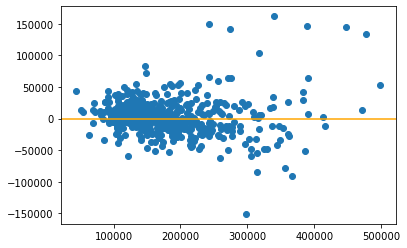

In [147]:
# Plot predictions (x-axis) against residuals (y-axis)
# Closer the scatter is to a horizontal line across zero, the better the model
residuals_1 = y_test - pred_1
plt.scatter(pred_1, residuals_1)
plt.axhline(0, color="orange")
plt

#### Comments on prediction plot
- Observe that sale price predictions for y_test values within the range of 0 to 300,000 is able to maintain a residual score of within +/- 50,000. Similar to the original test data set (without polynomial feature engineering)
- However, for y_test values greater than 300,000, the observed predicted sale price is observed to have a lower deviation from actual y_test values at ~150,000, compared to the original test data set of 200,000. 


#### _Variable Importance Plot_

In [148]:
#finding coefficients of features significance
coeff_1 = lr.coef_

In [149]:
# y intercept
lr.intercept_

5004473.354707733

In [150]:
# Creating dataframe from transformed X_train_poly dataset
X_train_poly_1 = pd.DataFrame(X_train_poly, columns= poly.get_feature_names(features_X_train))
lr_list_1 = X_train_poly_1.iloc[:,range(0,len(X_train_poly_1.columns))].columns.to_list()
coeff_rate_1 = pd.Series(lr.coef_, index= lr_list_1).sort_values(ascending = False)
coeff_rate_1

c_ord_heating_qc                            2.662108e+05
overall_qual                                1.000618e+05
c_ord_fireplace_qu                          6.803963e+04
c_tot_bsmt                                  6.650654e+04
c_tot_exter neighborhood_NridgHt            1.705038e+04
year_built neighborhood_NridgHt             8.122209e+03
c_total_bath neighborhood_NridgHt           2.445418e+03
c_total_bath c_ord_heating_qc               2.366477e+03
c_total_bath c_ord_garage_finish            2.079217e+03
c_ord_garage_finish^2                       1.979827e+03
c_tot_exter c_total_bath                    1.949533e+03
c_tot_exter c_ord_fireplace_qu              7.763776e+02
c_tot_exter c_ord_heating_qc                7.475482e+02
overall_qual c_ord_garage_finish            7.191981e+02
c_ord_heating_qc^2                          6.237154e+02
overall_qual^2                              5.806078e+02
overall_qual c_ord_fireplace_qu             4.255229e+02
c_tot_bsmt^2                   

In [151]:
coeff_rate_2 = coeff_rate_1[0:11]

Text(0.5, 0, 'Feature')

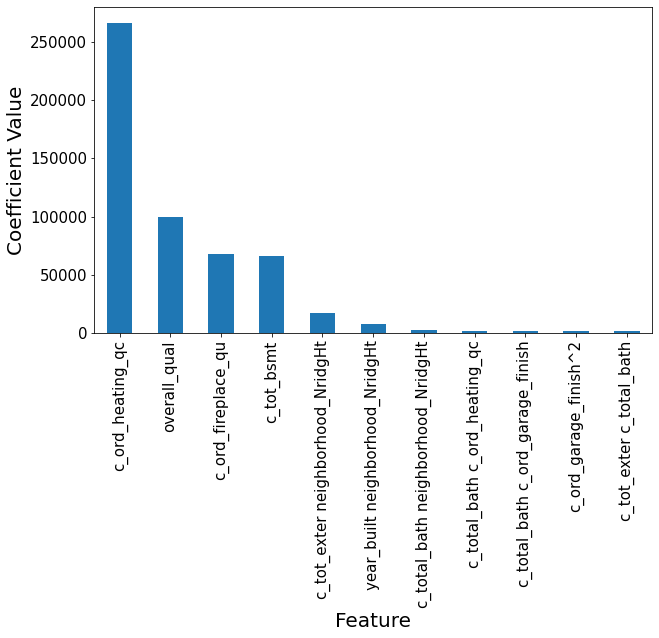

In [152]:
#plot significance of features (top 10 features only)
plt.figure(figsize = (10,6))
coeff_rate_2.plot(kind='bar')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Coefficient Value", fontsize = 20)
plt.xlabel("Feature",fontsize = 20)

**Comment on variable importance plot (feature coefficient):**
- Observe that the new top 5 features with the greatest contributions to sale price are c_ord_heating_qc, overall_qual, c_ord_fireplace_qu, c_tot_bsmt, c_tot_exter neighborhood_Nridght 
- Previous top 5 features are: NridgHt neighbourhood, overall quality, total exterior (total exterior quality and condition), total bath and fireplace quality.
- Overall quality, fireplace quality are features that are still in the top 5.
- Another observation is the magnitude of coefficient increased from previous max value of 30,000 to a max value of 250,000

## Scaling Method

In [153]:
# Create an instance of the StandardScaler() object
ss = StandardScaler()

In [154]:
# Compute the mean and std for X data to be used for scaling
ss.fit(X_train)

StandardScaler()

In [155]:
# Scale (Transform) X data based on its parameters  
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

#### Model cross validation

In [156]:
# lr model validation
cross_val_score(lr, X_train_sc, y_train, cv=3).mean()

0.8121824146531629

In [157]:
# lasso model validation
cross_val_score(lasso, X_train_sc, y_train, cv=3).mean()

0.8112323769508937

In [158]:
# Ridge model validation
cross_val_score(ridge, X_train_sc, y_train, cv=3).mean()

0.8124121547346594

In [159]:
ridge.score(X_train_sc, y_train)

-50.77951427685943

In [160]:
ridge.score(X_test_sc,y_test)

-51.37638758826254

#### Interpretation of cross_val_score with application of scaling:
- Inclusion of scaling interaction variable results in relatively similar R2 score for linear regression model
- Inclusion of scaling interaction variable results in a better R2 score for lasso regression model, however the R2 score is still poorer compared to linear regression + polynomial feature engineering.
- Inclusion of scaling interaction variable results in a poorer model performance score for ridge.

## Normalization Method

In [161]:
# Create an instance of the MinMaxScaler() object
mms = MinMaxScaler()

In [162]:
#fitting norm to dataframe
mms.fit(X_train)

MinMaxScaler()

In [163]:
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)

#### Model cross validation

In [164]:
# lr model validation
cross_val_score(lr, X_train_mms, y_train, cv=3).mean()

0.8121824146531628

In [165]:
# lasso model validation
cross_val_score(lasso, X_train_mms, y_train, cv=3).mean()

0.8055133704285571

In [166]:
# Ridge model validation
cross_val_score(ridge, X_train_mms, y_train, cv=3).mean()

0.8103382387332175

#### Interpretation of cross_val_score with application of Normalization:
- Inclusion of scaling interaction variable results in relatively similar R2 score for linear regression model
- Inclusion of scaling interaction variable results in a better R2 score for lasso regression model, however the R2 score is still poorer compared to linear regression + polynomial feature engineering.
- Inclusion of scaling interaction variable results in a relatively similar model performance score for ridge.

## Conclusions and Recommendations

### Conclusion:
- With an observed linear correlation between features and sale price from EDA and feature selection, it is possible to apply regression modelling techniques.
- Features for modelling, were selected through the use of pearson correlation to determine the pairwise correlation of the features in the dataset to sale price. The selected feature had at least > 0.4 correlation coefficient values, and are generally positively correlated to sale price.
- The features used includes overall_qual, c_total_area, garage_area, c_tot_exter, c_total_bath, year_built, c_tot_bsmt, c_ord_garage_finish, c_ord_fireplace_qu, mas_vnr_area, c_ord_heating_qc, neighborhood_NridgHt, bsmtfin_sf_1, c_total_porch_area.
- The model that was best at predicting sale price was Linear Regression model. With the application of polynomial feature engineering method, the resulting R-square value improved from its previous test value of ~82% to 86%, with Linear Regression model having the best R2 and RMSE values in comparison to Lasso and Ridge models.
- Using the variable importance plot, it is observed that the top 3 features with greatest contributions to sale price are c_ord_heating_qc, overall_qual, c_ord_fireplace_qu.
- Looking further at the model's accuracy, based on the prediction plot for the Linear Regression model, it can be observed that sale price predictions for y_test values within the range of 0 to 300,000 is able to maintain a residual score of within +/- 50,000, however for y_test values greater than 300,000, the observed predicted sale price is observed to have higher deviations from actual y_test values. This shows the limitations of the model at higher sale price values, and can be attributed to the limited data in the dataframe for sale price values of more than 300,000 USD.

### Recommendations:
- Observed that the top 3 features with greatest contributions to sale price are the heating quality and condition (c_ord_heating_qc), overall material and finish of the house (overall_qual), fireplace quality (c_ord_fireplace_qu), ]
- More budget can be allocated to prioritization of these core features, to improve the attractiveness of the new housing developments to potential buyers.
- More marketing efforts can also be channeled to advertise these features.

## Steps To Move Project Forward

### Moving Forward:
- To include data from more recent years, as dataset used were housing sale prices from 2006 to 2010.
- To have more clarity and description for ordinal features, for example what does an Excellent grade for fireplace quality mean and account for.  